### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Importing Libraries and warnings

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [2]:
#Reading the previous-application csv file
previous_application = pd.read_csv('previous_application.csv',header=0)

In [3]:
#explore the dataset
print(previous_application.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [4]:
print(previous_application.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [5]:
#Reading the application-data csv file
application_data = pd.read_csv('application_data.csv',header=0)

In [6]:
#examine the size of the data
application_data.shape

(307511, 122)

In [7]:
#explore the dataset
print(application_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


### Data Handling and Cleaning

### Checking the null values

In [8]:
#checking null percentage for previous_application
round(100*(previous_application.isnull().sum()/len(previous_application.index)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [9]:
#checking null percentage for application_data
pd.set_option('display.max_rows',None)
print(round(100*(application_data.isnull().sum()/len(application_data.index)), 2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### Drop the coulmns where there are more than 40% of null values

In [10]:
null = application_data.isnull().sum()
null = null[null >=0.40*len(application_data)]
len(null)

49

#### There are 49 columns having missing values more than 40% in Application Dataset.

In [11]:
null1 = previous_application.isnull().sum()
null1 = null1[null1 >=0.40*len(previous_application)]
len(null1)

11

#### There are 11 columns having missing values more than 40% in Previous Dataset

In [12]:
#Removing those 49 columns from Application Dataset
null = list(null[null.values>=0.4].index)
application_data.drop(labels=null,axis=1,inplace=True)

In [13]:
application_data.shape

(307511, 73)

In [14]:
#Removing those 11 columns from Previous Application Dataset
null1= list(null1[null1.values>=0.4].index)
previous_application.drop(labels=null1,axis=1,inplace=True)

In [15]:
previous_application.shape

(1670214, 26)

In [16]:
#Checking once again for missing values
pd.set_option('display.max_rows',None)
100*(application_data.isnull().sum()/len(application_data))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [17]:
pd.set_option('display.max_rows',None)
100*(previous_application.isnull().sum()/len(previous_application))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

- #### For null values of less than 5%, we can fill them with mode value of respected columns.
- #### For numerical columns having above 5% that is 5-40% null values, we can fill nulls with median value of respected columns.
- #### For categorical columns having above 5% that is 5-40% null values,we can add another category named 'Missing' or 'Unknown' in those columns

### Analyze & drop unwanted columns in Application Dataset

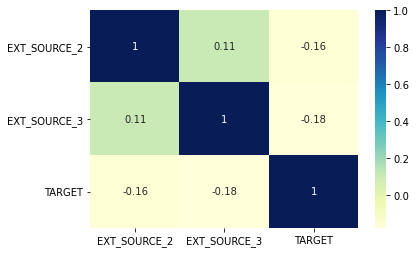

In [18]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Exit_Source = application_data[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
Exit_Source_corr = Exit_Source.corr()
ax = sns.heatmap(Exit_Source_corr,xticklabels=Exit_Source_corr.columns,yticklabels=Exit_Source_corr.columns,annot = True,cmap ="YlGnBu")

Since there is no correlation between target column and ext_source columns, we can drop them.

In [19]:
#Droping ext_source columns from Application Dataset
Exit_Source = ["EXT_SOURCE_2","EXT_SOURCE_3"]
application_data.drop(labels=Exit_Source,axis=1,inplace=True)

In [20]:
#Checking Flag Document Relation with Loan Repayment Column
flag_doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

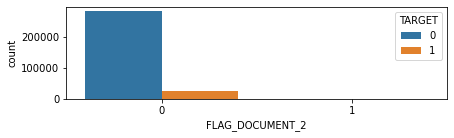

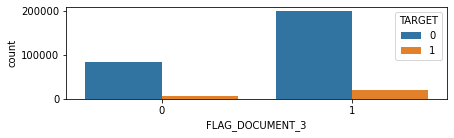

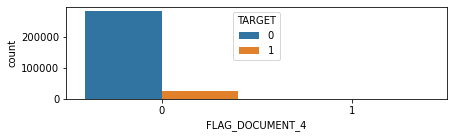

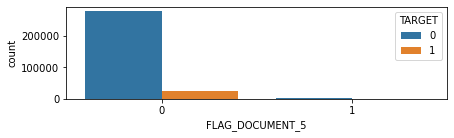

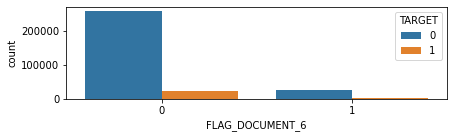

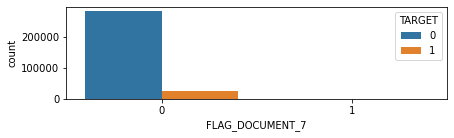

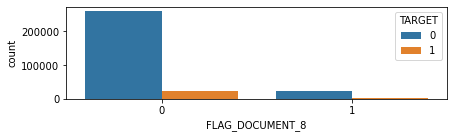

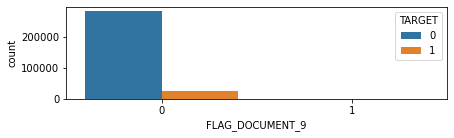

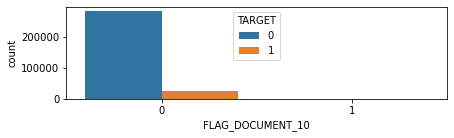

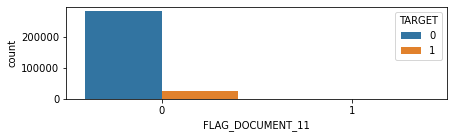

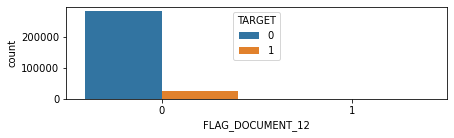

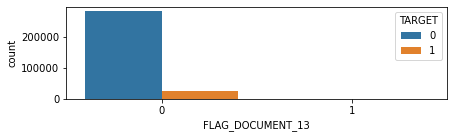

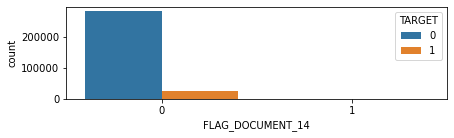

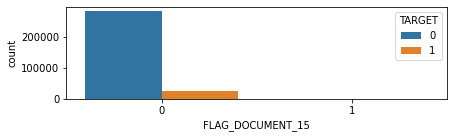

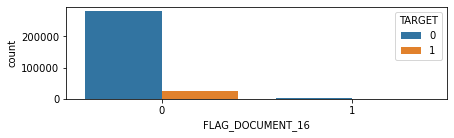

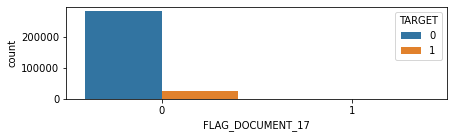

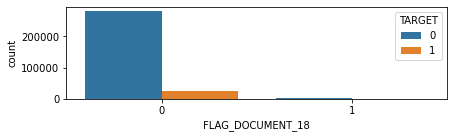

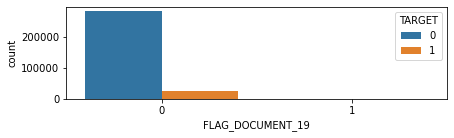

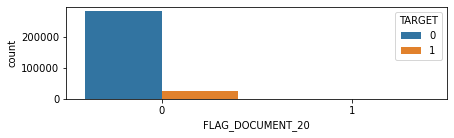

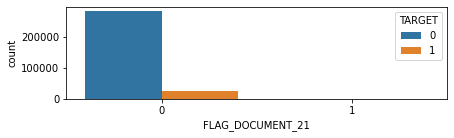

In [21]:
#Since there are a lot of columns, we can run our analysis in loops for the appropriate columns and find the insights.
for i in flag_doc:
    plt.figure(figsize=(15,20))
    plt.subplot(10,2,1)
    sns.countplot(application_data[i],hue = application_data.TARGET)

The above plots clearly shows that the client who applied for loans has not submitted FLAG_DOCUMENT_X. Only FLAG_DOCUMENT_3 has been submitted so we can delete rest of the columns. And also if the data shows that the borrower has submitted the FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [22]:
#Assign all the flag_documents to the flag except for FLAG_DOCUMENT_3
flag = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [23]:
#dropping flag document columns from Application Dataset except flag document 3
application_data.drop(labels=flag,axis=1,inplace=True)

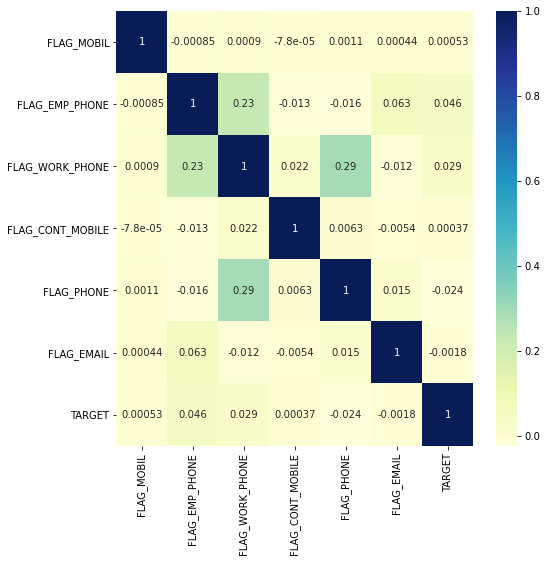

In [24]:
#Checking whether other contact parameters correlation Target Column
contact_par = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_par_corr = application_data[contact_par].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_par_corr,xticklabels=Contact_par_corr.columns,yticklabels=Contact_par_corr.columns,annot = True,cmap ="YlGnBu",)

Since there is negligible correlation between contact parameter columns and target column. Thus, we can drop these columns.

In [25]:
#dropping contact parameter columns from Application Dataset
contact_par = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
application_data.drop(labels=contact_par,axis=1,inplace=True)

In [26]:
application_data.shape

(307511, 46)

### Removing Negatives from days values in Application dataset

In [27]:
application_data.DAYS_BIRTH = abs(application_data.DAYS_BIRTH)
application_data.DAYS_EMPLOYED = abs(application_data.DAYS_EMPLOYED)
application_data.DAYS_REGISTRATION = abs(application_data.DAYS_REGISTRATION)

In [28]:
application_data.DAYS_ID_PUBLISH = abs(application_data.DAYS_ID_PUBLISH)
application_data.DAYS_LAST_PHONE_CHANGE = abs(application_data.DAYS_LAST_PHONE_CHANGE)

In [29]:
#Same for the previous dataset
previous_application.DAYS_DECISION = abs(previous_application.DAYS_DECISION)
previous_application.SELLERPLACE_AREA = abs(previous_application.SELLERPLACE_AREA)

Lets standardize the values using bins

### Standardize Values

In [30]:
#Creating bins for DAYS_DECISION column
bins = [0,90,180,270,360,450,540,630]
decision_range = ['0-90','90-180','180-270','270-360','360-450','450-540','540 and above']
previous_application['DAYS_TOOK_FOR_DECISION'] = pd.cut(previous_application.DAYS_DECISION,bins=bins,labels=decision_range)

In [31]:
previous_application.DAYS_TOOK_FOR_DECISION.value_counts()

180-270          181321
270-360          166586
360-450          129303
90-180           128418
450-540          102503
0-90              88426
540 and above     80836
Name: DAYS_TOOK_FOR_DECISION, dtype: int64

In [32]:
#Converting AMT_INCOME_TOTAL into INCOME_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,1000000]
income = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000 and above']
application_data['INCOME_RANGE'] = pd.cut(application_data.AMT_INCOME_TOTAL,bins=bins,labels = income)

In [33]:
application_data.INCOME_RANGE.value_counts()

100000-150000       91591
150000-200000       64307
50000-100000        59181
200000-250000       48137
250000-300000       17039
300000-350000        8874
350000-400000        5802
400000-500000        5361
0-50000              4517
500000 and above     2452
Name: INCOME_RANGE, dtype: int64

In [34]:
#Converting AMT_CREDIT into CREDIT_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,1200000,15000000]
credit = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000-12000000','12000000 and above']
application_data['CREDIT_RANGE'] = pd.cut(application_data.AMT_CREDIT,bins=bins,labels = credit)

In [35]:
application_data.CREDIT_RANGE.value_counts()

500000-600000         34232
400000-500000         32038
250000-300000         31759
12000000 and above    27859
600000-700000         24049
200000-250000         23054
1000000-12000000      22126
800000-900000         21792
700000-800000         19193
150000-200000         17985
300000-350000         16205
100000-150000         12155
350000-400000         10133
900000-1000000         8927
50000-100000           5443
0-50000                 561
Name: CREDIT_RANGE, dtype: int64

In [36]:
#Converting DAYS_EMPLOYED into EMPLOYED_Years
application_data.EMPLOYED_YEARS = application_data.DAYS_EMPLOYED // 365
bins = [0,5,10,15,20,25,30,35,40,50]
years = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40 and above']
application_data['EMPLOYED_YEARS'] = pd.cut(application_data.EMPLOYED_YEARS,bins=bins,labels = years)

In [37]:
application_data['EMPLOYED_YEARS'].value_counts()

0-5             124634
5-10             55983
10-15            22928
15-20             9730
20-25             5465
25-30             2944
30-35             1740
35-40              634
40 and above       175
Name: EMPLOYED_YEARS, dtype: int64

In [38]:
#Converting Days Birth into age groups
application_data['AGE_GROUP'] = application_data['DAYS_BIRTH'] // 365
bins = [0,18,30,40,60,80,100]
age_group = ['0-18','18-30','30-40','40-60','60-80','80 and above']
application_data['AGE_GROUP']=pd.cut(application_data['AGE_GROUP'],bins=bins,labels=age_group)

In [39]:
application_data.AGE_GROUP.value_counts()

40-60           142220
30-40            83117
18-30            52806
60-80            29368
0-18                 0
80 and above         0
Name: AGE_GROUP, dtype: int64

- #### Lets merge the two dataframes

### Merging both the datasets

In [40]:
application_previous_merged = pd.merge(left=application_data,right=previous_application,how='inner',on='SK_ID_CURR')

In [41]:
pd.set_option('display.max_column',None)
application_previous_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,EMPLOYED_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_TOOK_FOR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000,0-5,18-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,540 and above
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-150000,NaN,40-60,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,X

In [42]:
application_previous_merged.shape

(1413701, 76)

### Checking for Outliers

In [43]:
def box_plot(column_name,title):
    sns.boxplot(column_name)
    sns.set_style('darkgrid')
    plt.xscale('log')
    plt.title(title)

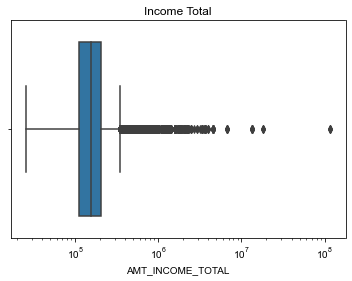

In [44]:
#Plotting boxplot for Income Total
box_plot(application_previous_merged.AMT_INCOME_TOTAL,'Income Total')

- #### There are few outliers in this column.
- #### Majority of income lies before 1 Million

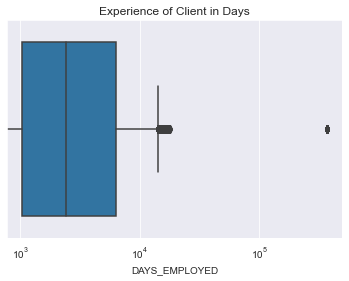

In [45]:
#Plottting boxplot for experience of client
box_plot(application_previous_merged.DAYS_EMPLOYED,'Experience of Client in Days')

- #### There is only one outlier beyond 100k in this column.
- #### The 25% of data lies around 1k.

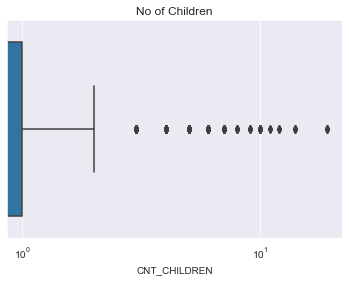

In [46]:
# Plotting boxplot for CNT_CHILDREN
box_plot(application_previous_merged.CNT_CHILDREN,'No of Children')

- #### There are many outliers in this column.
- #### 50% of the children count is equal to 0.

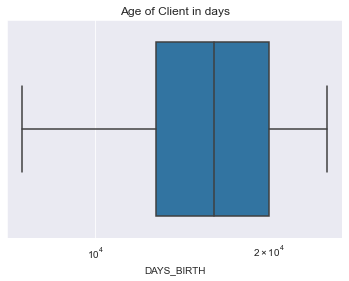

In [47]:
# Plotting boxplot for Age of Client in days
box_plot(application_previous_merged.DAYS_BIRTH,'Age of Client in days')

- #### There are no outliers in this column.

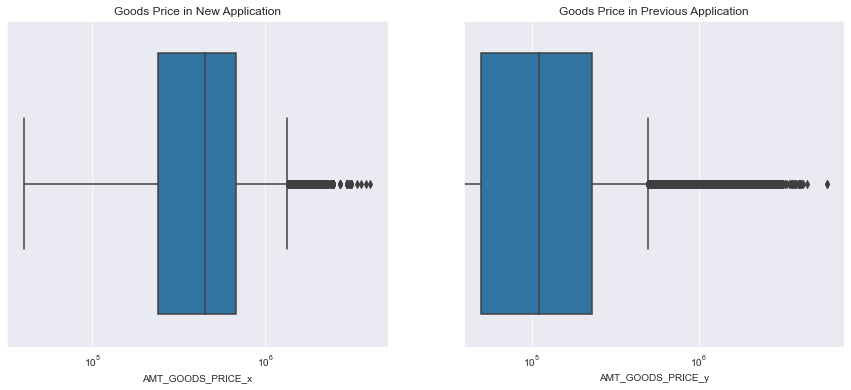

In [48]:
#Plotting boxplot for Goods Price in New and Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box_plot(application_previous_merged.AMT_GOODS_PRICE_x,'Goods Price in New Application')
plt.subplot(1,2,2)
box_plot(application_previous_merged.AMT_GOODS_PRICE_y,'Goods Price in Previous Application')

- #### There is one outlier in among good price in previous application.
- #### And the rest are in continuous form.

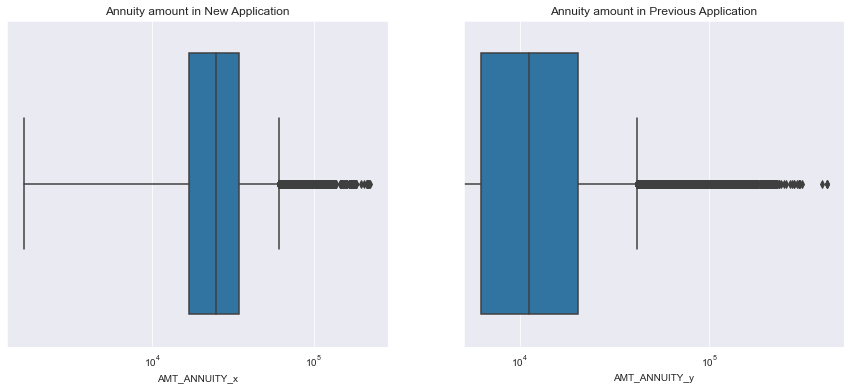

In [49]:
#Plotting boxplots for Annuity Amount in New Apllication and Annuity Amount in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box_plot(application_previous_merged.AMT_ANNUITY_x,'Annuity amount in New Application')

plt.subplot(1,2,2)
box_plot(application_previous_merged.AMT_ANNUITY_y,"Annuity amount in Previous Application")

- #### There are few outliers in annuity amount in previous applciation.
- #### Most of the data is in continuous form.

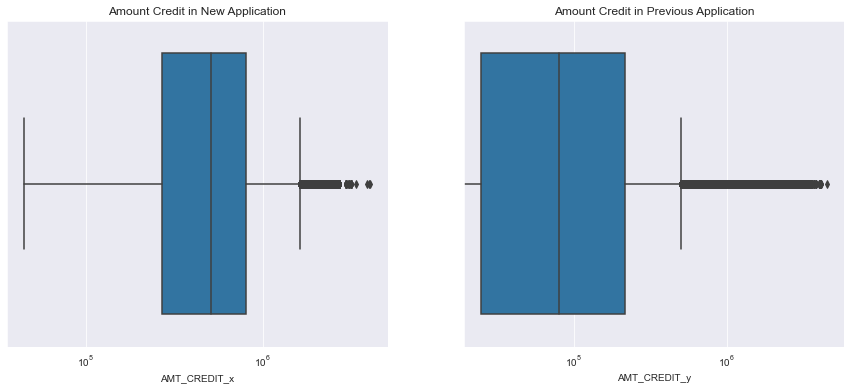

In [50]:
#Plotting boxplots for Amount Credit in New Apllication and Amount Credit in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box_plot(application_previous_merged.AMT_CREDIT_x,'Amount Credit in New Application')

plt.subplot(1,2,2)
box_plot(application_previous_merged.AMT_CREDIT_y,"Amount Credit in Previous Application")

- #### There is one outlier in amount credit in new applciation.
- #### Most of the data is in continuous form.

### Uni-Variate Analysis 
Univariate analysis deals with analysing a single column/variable.

#### Lets define a function that inputs Figure size, Column,Title and rotation axis. 

In [51]:
def uni_plot(figsize,col,title,rotation):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(col)
    plt.yscale('log')
    plt.xticks(rotation=rotation)
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.show()

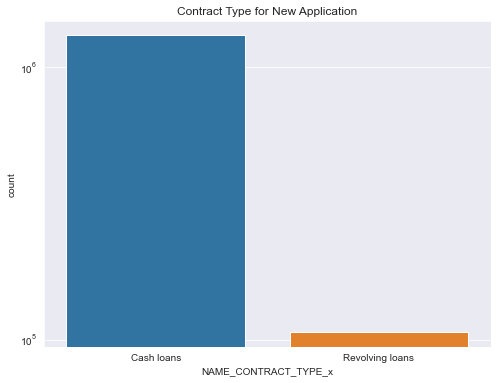

In [52]:
#Plotting Contract Type of Loan
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_CONTRACT_TYPE_x,
         title='Contract Type for New Application',
         rotation=0)

- #### Count of Cash loans is highest which is more than 1 Million (above 10^6).
- #### Count of Revolving loans is slightly above 100k (above 10^5).

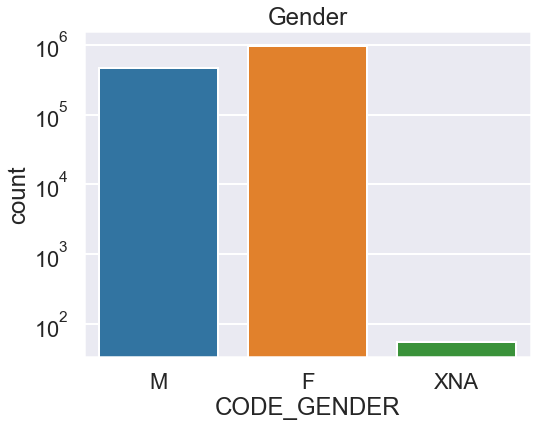

In [53]:
#Plotting Gender of Applicant
uni_plot(figsize=(8,6),
         col=application_previous_merged.CODE_GENDER,
         title='Gender',
         rotation=0)

- #### Count of Female is more than Male for New Application for loan

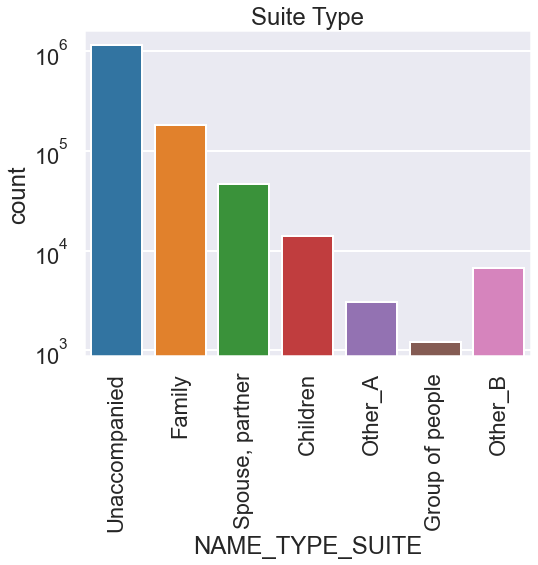

In [54]:
# Plotting suite type of applicant
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_TYPE_SUITE,
         title='Suite Type',
         rotation=90)

- #### So from the above plot we can infer that people who mostly unaccompanied while applying for loan are more in numbers.
- #### And also we can infer that there are very few people apply loan from group of people.

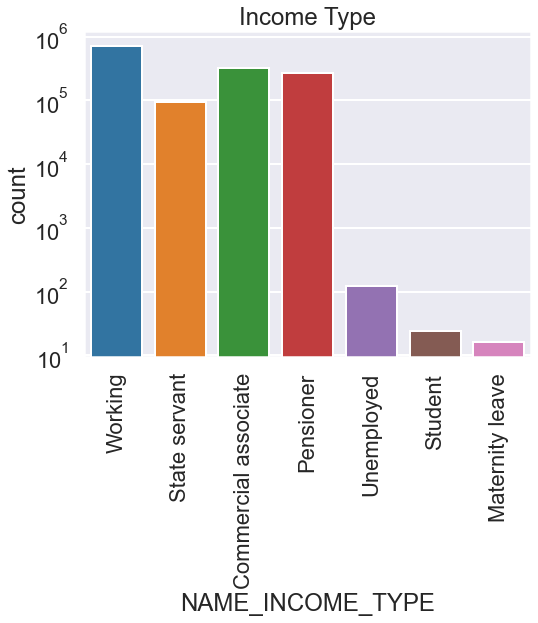

In [55]:
#plotting types of income of applicant
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_INCOME_TYPE,
         title='Income Type',
         rotation=90)

- #### From the above plot we can infer that "Working" type has the highest count.
- #### And also we can infer that "Maternity leave" and "Student" type are the lowest.

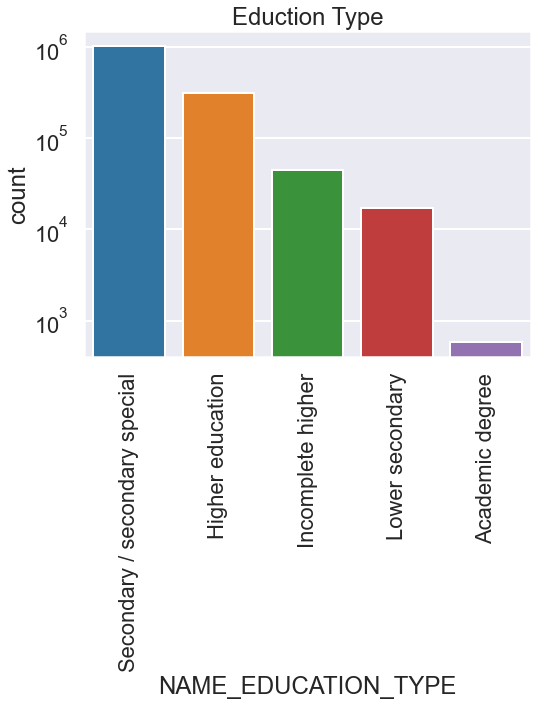

In [56]:
#Plotting Applicant's Eductaion Type
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_EDUCATION_TYPE,
         title='Eduction Type',
         rotation=90)

- #### From the above plot we can infer that "Secondary/Secondary special" type has the highest count of people.
- #### And also we can infer that "Academic Degree" type has the lowest count of people.

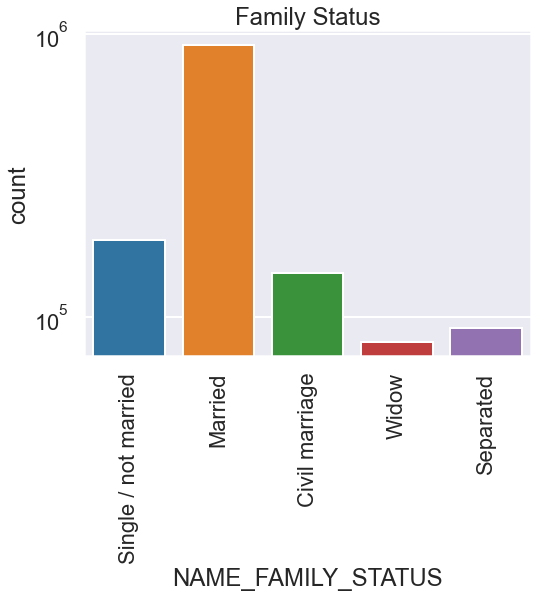

In [57]:
#Plotting Applicant's Martial Status
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_FAMILY_STATUS,
         title="Family Status",
         rotation=90)

- #### From the above plot we can infer that People who are "Married" has the highest count.
- #### And also we can infer that People who are "Widow" has the lowest count.

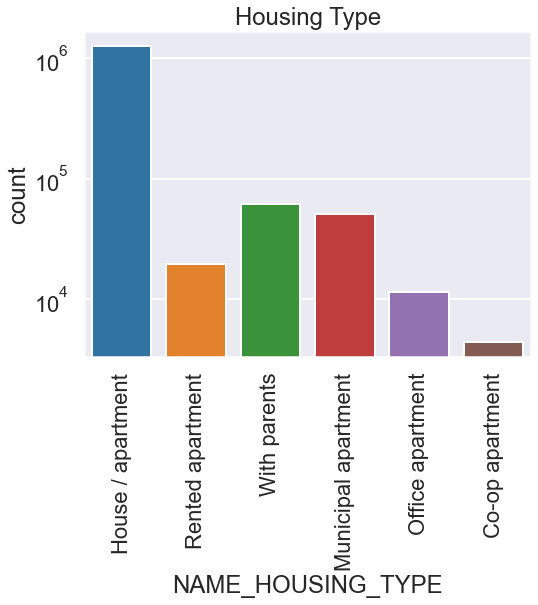

In [58]:
#plotting Housing Type of Applicant
uni_plot(figsize=(8,6),
         col=application_previous_merged.NAME_HOUSING_TYPE,
         title="Housing Type",
         rotation=90)

- #### From the above plot we can infer that People having "House/apartment" has the highest count.
- #### And also we can infer that People having "Co-op apartment" has the lowest count.

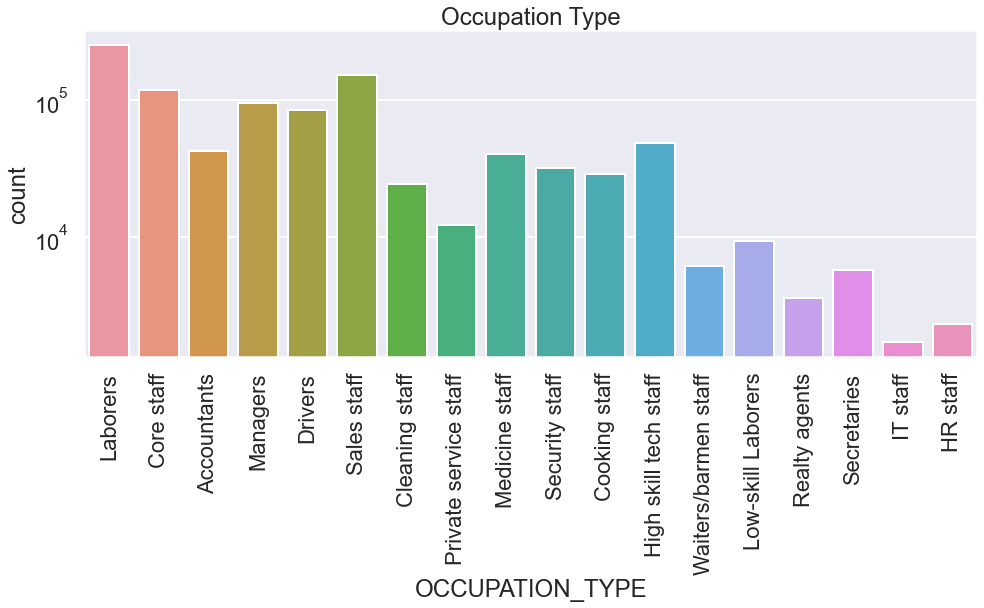

In [59]:
#Plotting Applicant's Occupation Type
uni_plot(figsize=(16,6),
         col=application_previous_merged.OCCUPATION_TYPE,
         title="Occupation Type",
         rotation=90)

- #### From the above plot we can infer that People having "Laborers" type occupation has the highest count.
- #### And also we can infer that People having "IT" and "HR" type occupation has the lowest count.

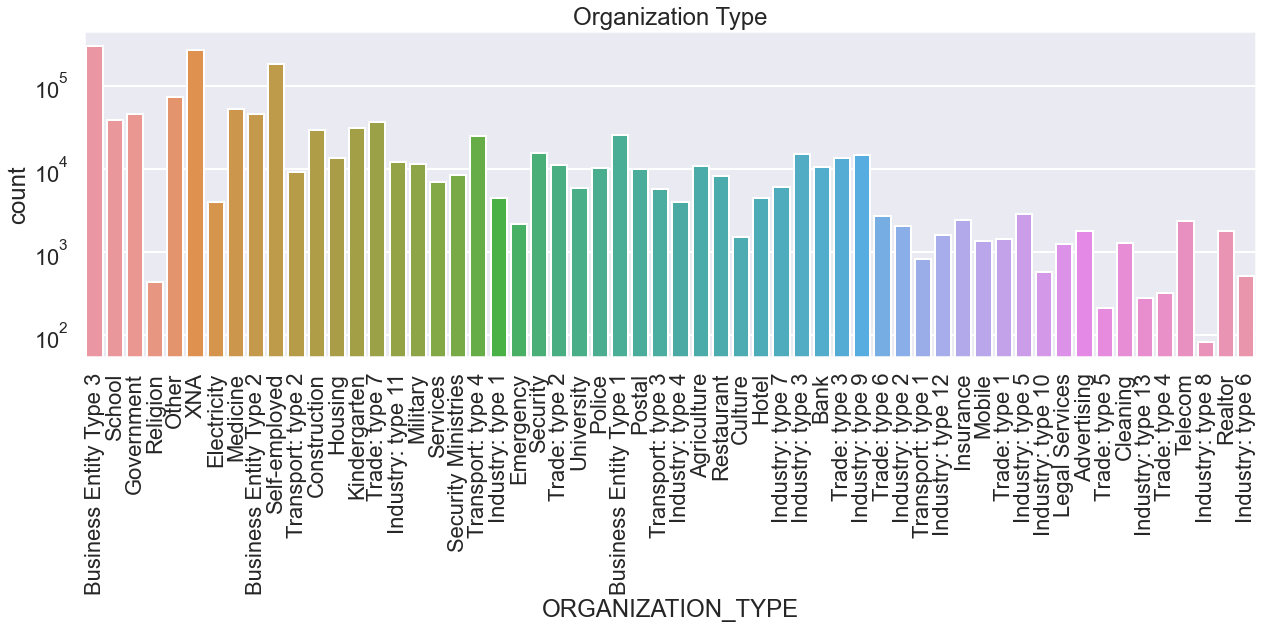

In [60]:
#Plotting Applicant's Organization type
uni_plot(figsize=(21,6),
         col=application_previous_merged.ORGANIZATION_TYPE,
         title="Organization Type",
         rotation=90)

- #### From the above plot we can infer that People working in "Business Entity Type 3" type organization has the highest count.
- #### And also "XNA" type organization which means Not Applicable has second highest count, which means many people's organization type is unknown.  
- #### And also we can infer that People working in "Industry Type 8" type organization has the lowest count.

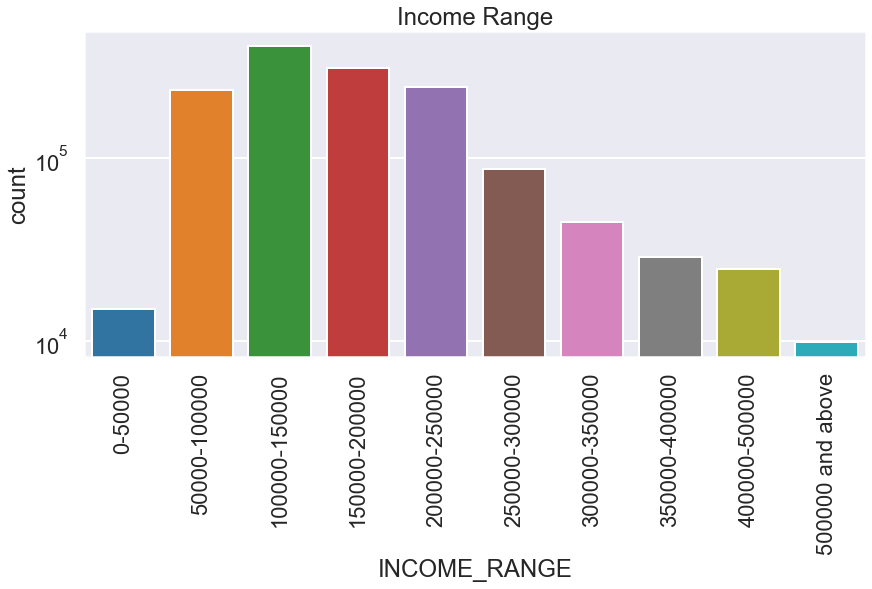

In [61]:
#Plotting Income Range of the Applicants
uni_plot(figsize=(14,6),
         col=application_previous_merged.INCOME_RANGE,
         title="Income Range",
         rotation=90)

- #### From the above plot we can infer that People having income range of (50000-100000),(100000-150000),(150000-200000) and (200000-250000) has the highest counts of people.
- #### And also we can infer that People having income range of (0-50000),(500000 and above) and (400000-500000) has the lowest count of people.

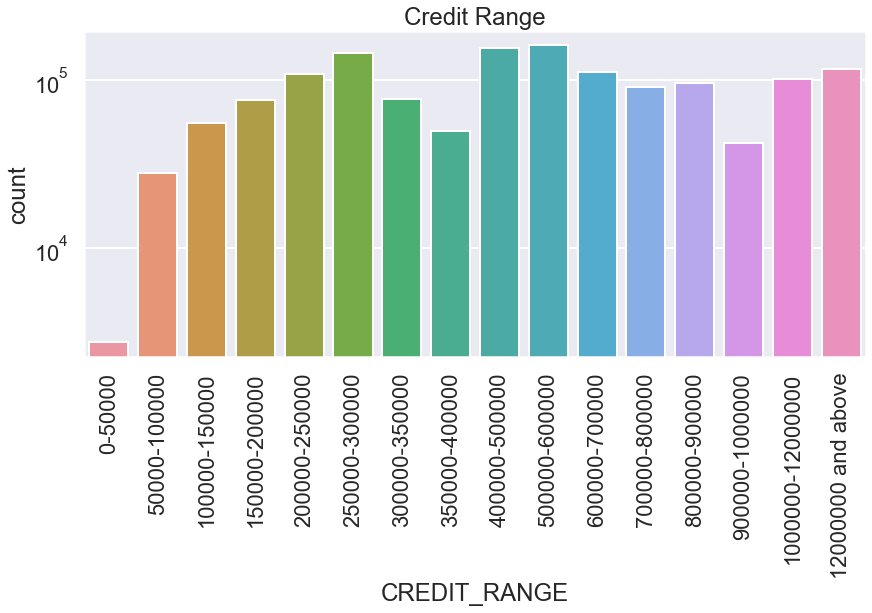

In [62]:
#plotting Credit range of applicants
uni_plot(figsize=(14,6),
         col=application_previous_merged.CREDIT_RANGE,
         title="Credit Range",
         rotation=90)

- #### From the above plot we can infer that People having Cerdit range of (250000-300000),(400000-500000) and (500000-600000) has the highest counts.
- #### And also we can infer that People having Credit range of (0-50000) has the lowest count.

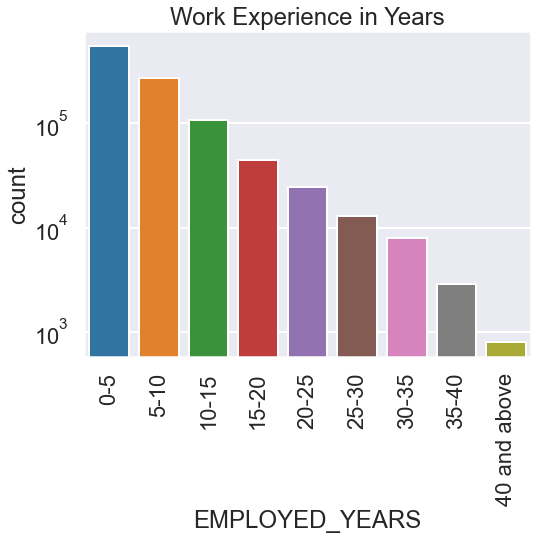

In [63]:
#plotting Work Experience of Applicant
uni_plot(figsize=(8,6),
         col=application_previous_merged.EMPLOYED_YEARS,
         title="Work Experience in Years",
         rotation=90)

- #### From the above plot we can infer that People having Experience between "0-5" has the highest count.
- #### And also we can infer that People having Experience of "40 and above" has the lowest count.
- #### We can infer that as year of experience increases, people applying for loans decreases.

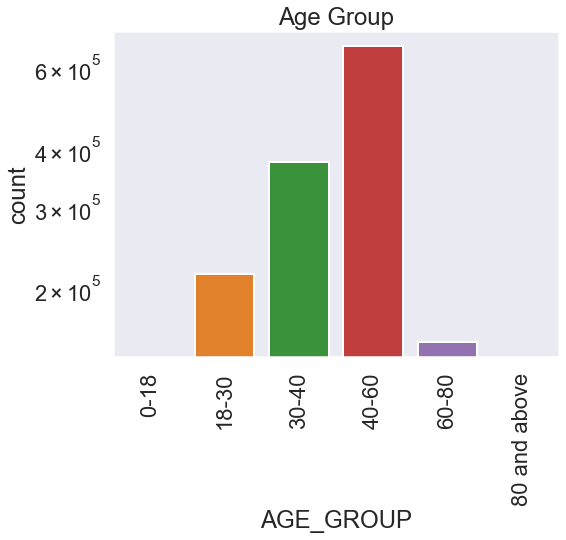

In [64]:
#plotting Applicant's Age group
uni_plot(figsize=(8,6),
         col=application_previous_merged.AGE_GROUP,
         title="Age Group",
         rotation=90)

- #### From the above plot we can infer that People in age group "40-60" has the highest count.
- #### And also we can infer that People in age group "60-80" has the lowest count.

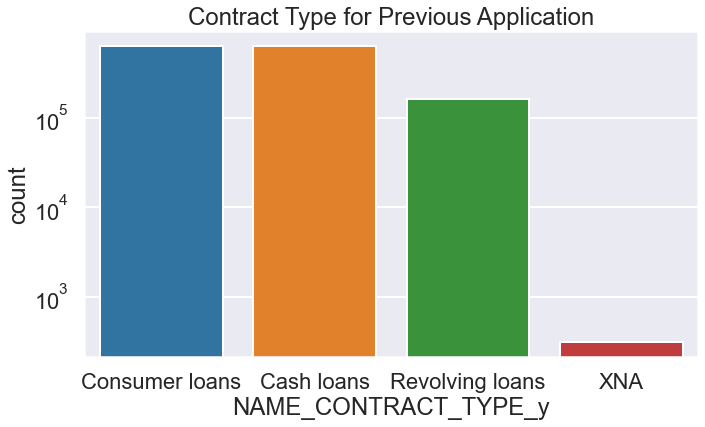

In [65]:
#Plotting Previous Contract type of Applicant
uni_plot(figsize=(11,6),
         col=application_previous_merged.NAME_CONTRACT_TYPE_y,
         title='Contract Type for Previous Application',
         rotation=0)

- #### From the above plot we can infer that Previously, People mostly applied for either Consumer loans or Cash loans.

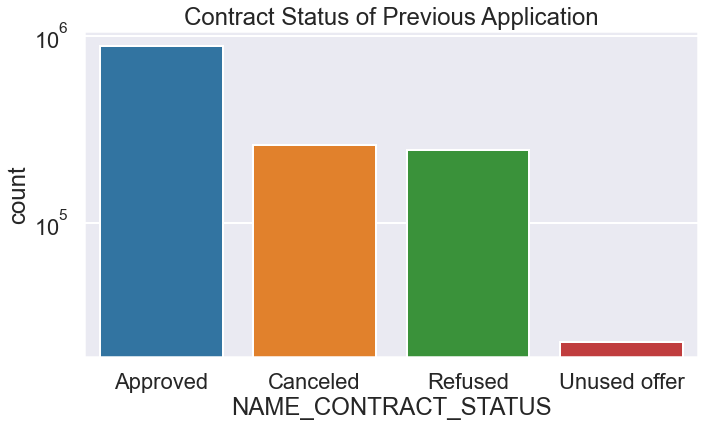

In [66]:
#plotting Contract Status for Precious Application for Loan
uni_plot(figsize=(11,6),
         col=application_previous_merged.NAME_CONTRACT_STATUS,
         title="Contract Status of Previous Application",
         rotation=0)

- #### From the above plot we can infer that Perviously, most of the loans were approved
- #### And also we can infer that Previously, the count of loans that are canceled and refused are almost same.

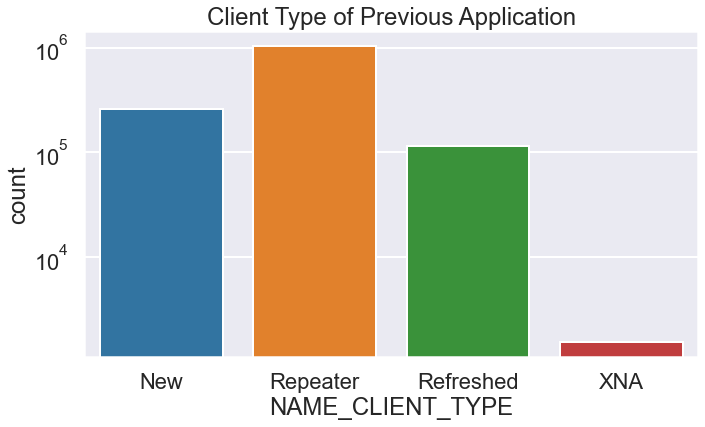

In [67]:
#plotting Client Type of Previous Application
uni_plot(figsize=(11,6),
         col=application_previous_merged.NAME_CLIENT_TYPE,
         title="Client Type of Previous Application",
         rotation=0)

- #### From the above plot we can infer that People who applied for loans repeatedly are more in number than the new applicants.

### Segmented Uni-Variate Analysis
Segmented Univariate analysis can be used to find summary of a single data variable in form of segments

Lets plot the other necessary cases with target variable using segmented uni-variate analysis to get more inference.  

#### Lets define a function that inputs Figure size,Column,Title and hue.

In [68]:
def seg_uniplot(figsize,col,title,hue=None):
    sns.set_style('dark')
    sns.set_context('poster')
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.title(title)
    
    #Here we are using countplot as we used in univariate analysis and using value_counts built-in function, we are getting the count values and giving it as order in the countplot.
    ax = sns.countplot(x=col, order=col.value_counts().index, hue=hue, palette='coolwarm')
    
    plt.show()

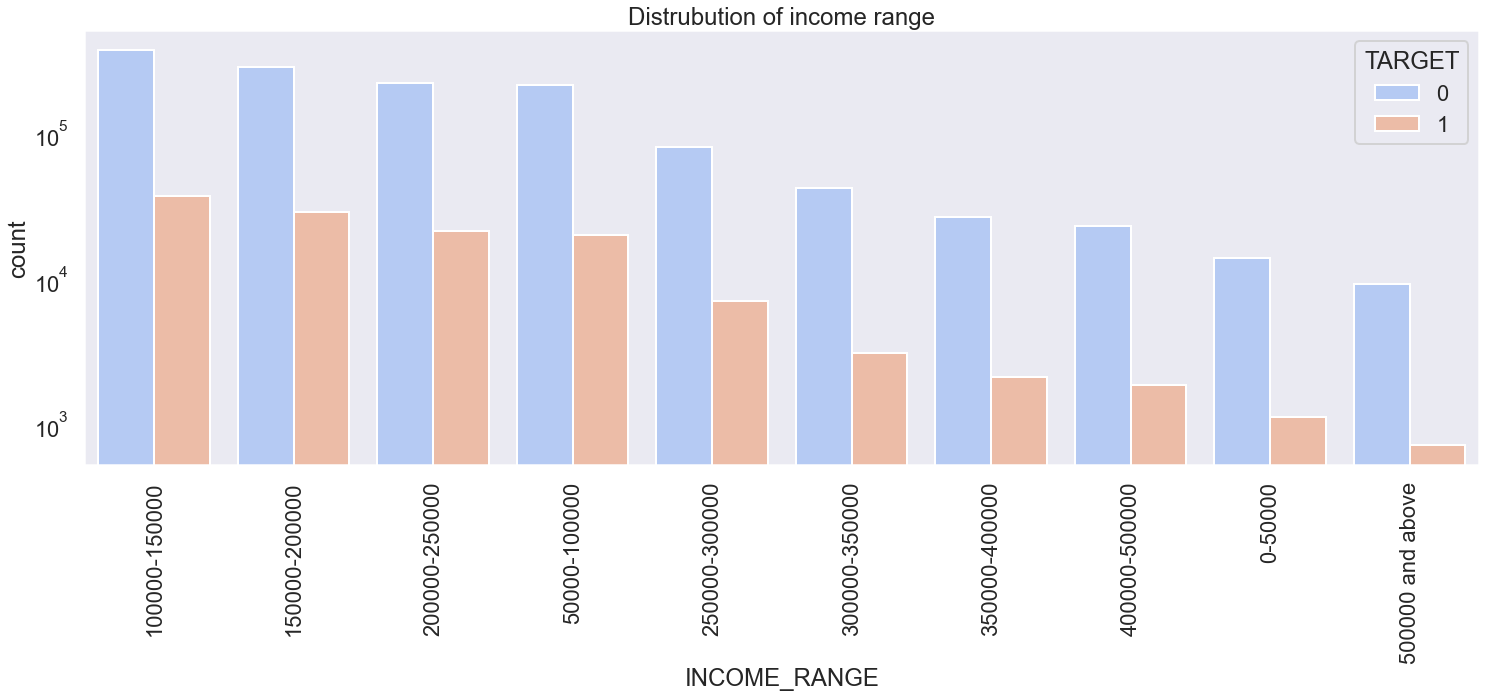

In [69]:
#Plotting Distribution of Income Range for target column
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.INCOME_RANGE,
            title='Distrubution of income range',
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that People with income range of 500000 and above are least defaulters.
- #### And also we can infer that people with income range 50000 to 250000(first 4 plots) are most likely to default loan.

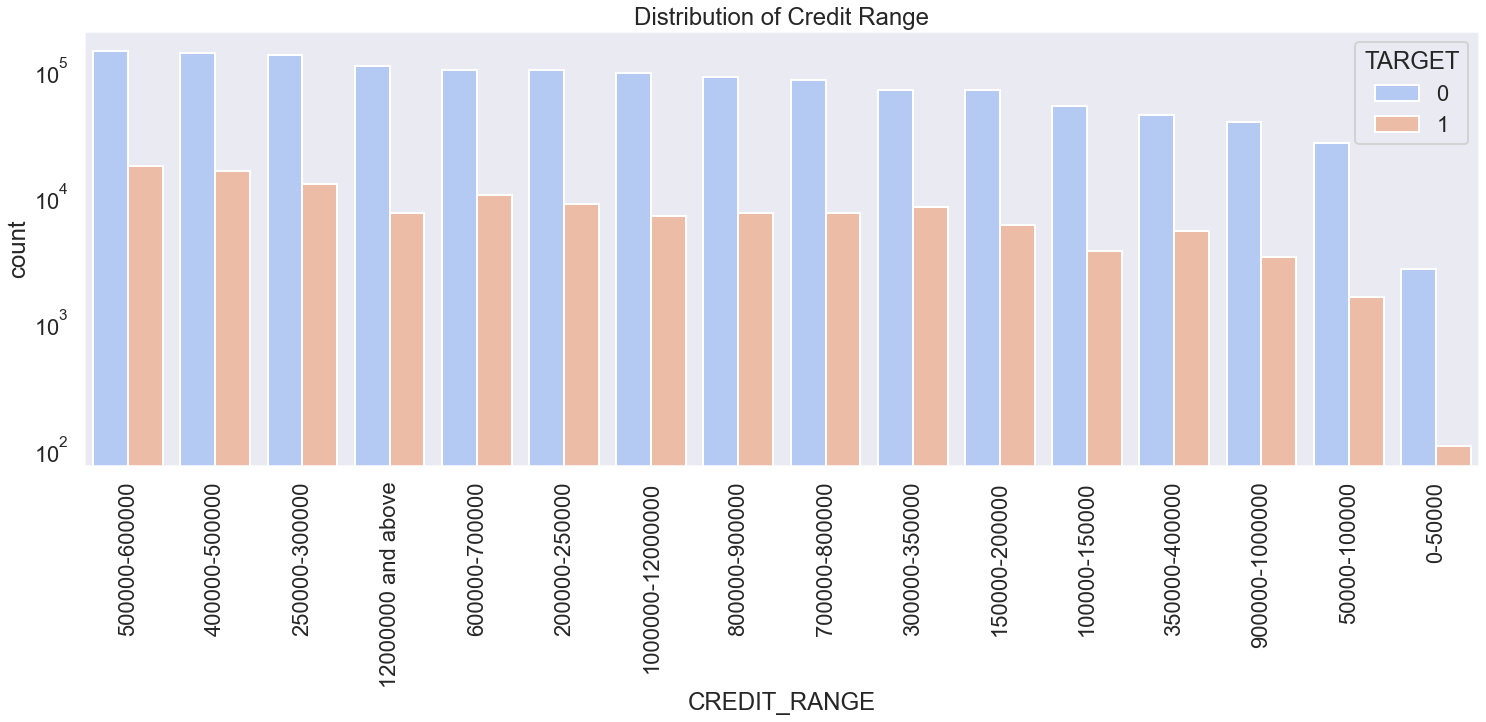

In [70]:
#plotting Distribution of Credit Range for Target column
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.CREDIT_RANGE,
            title='Distribution of Credit Range',
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that People with cerdit range of 0-50000 are least to be defaulters.
- #### And also we can infer that people with all other cerdit range except for 0-50000 are most likely to default loan.

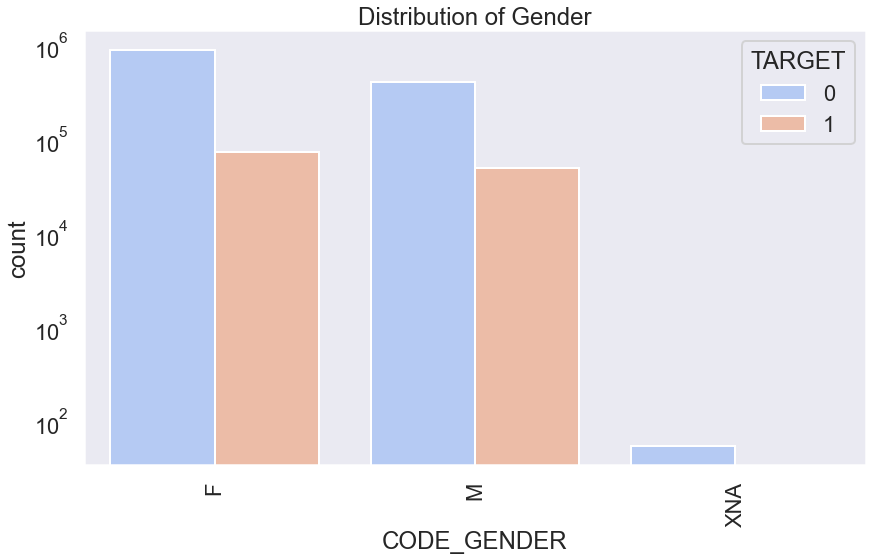

In [71]:
#plotting Distribution of Gender 
seg_uniplot(figsize=(14,8),
            col=application_previous_merged.CODE_GENDER,
            title='Distribution of Gender',
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that Female applicants are more likely to be defaulter than male applicants.
- #### And also we can infer that Female applicants are good repayers of loans than male applicants.

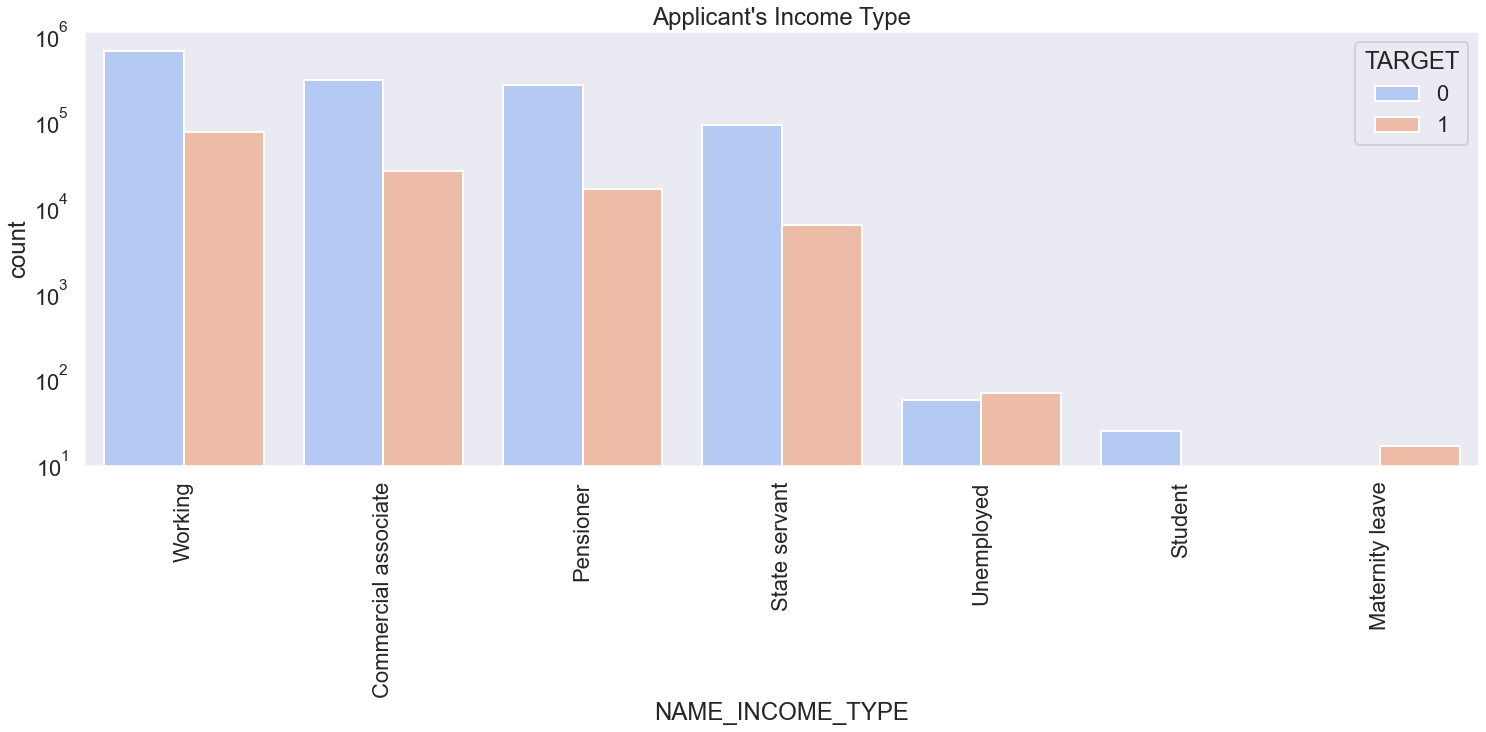

In [72]:
#plotting Distribution of Applicant's Income Type
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.NAME_INCOME_TYPE,
            title="Applicant's Income Type",
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that "Working" income type applicants are more likely to be defaulter
- #### And also we can infer that "Maternity leave" applicants are mostly a defaulter.
- #### We can infer that "Unemployed" type applicants have highest repayment to that of default.  

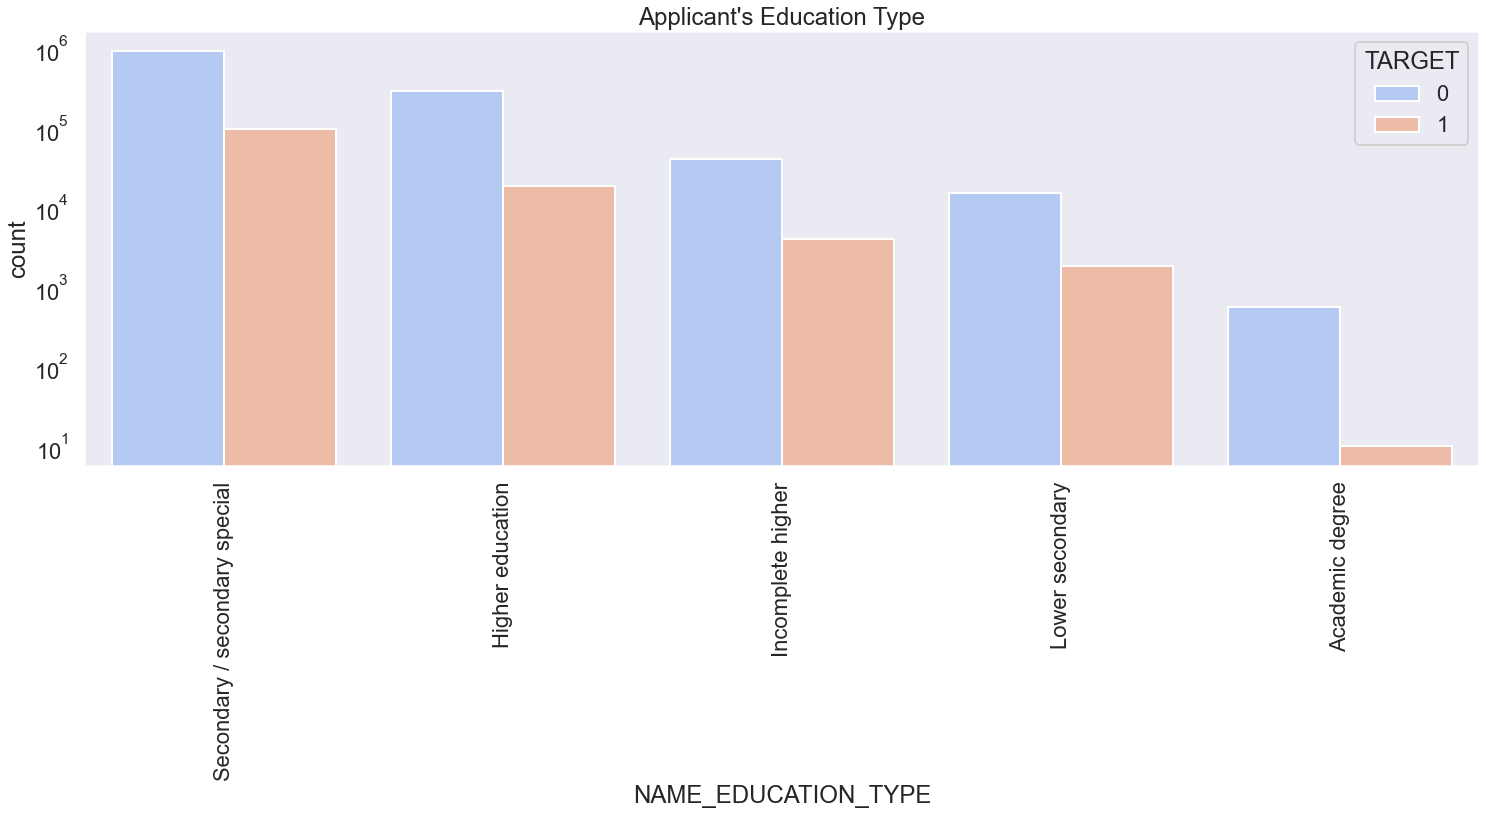

In [73]:
#plotting Distribution of Applicant's Education Type
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.NAME_EDUCATION_TYPE,
            title="Applicant's Education Type",
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that "Secondary/secondary special" education type applicants are more likely to be defaulter.
- #### And also we can infer that "Academic Degree" applicants are least defaulter.

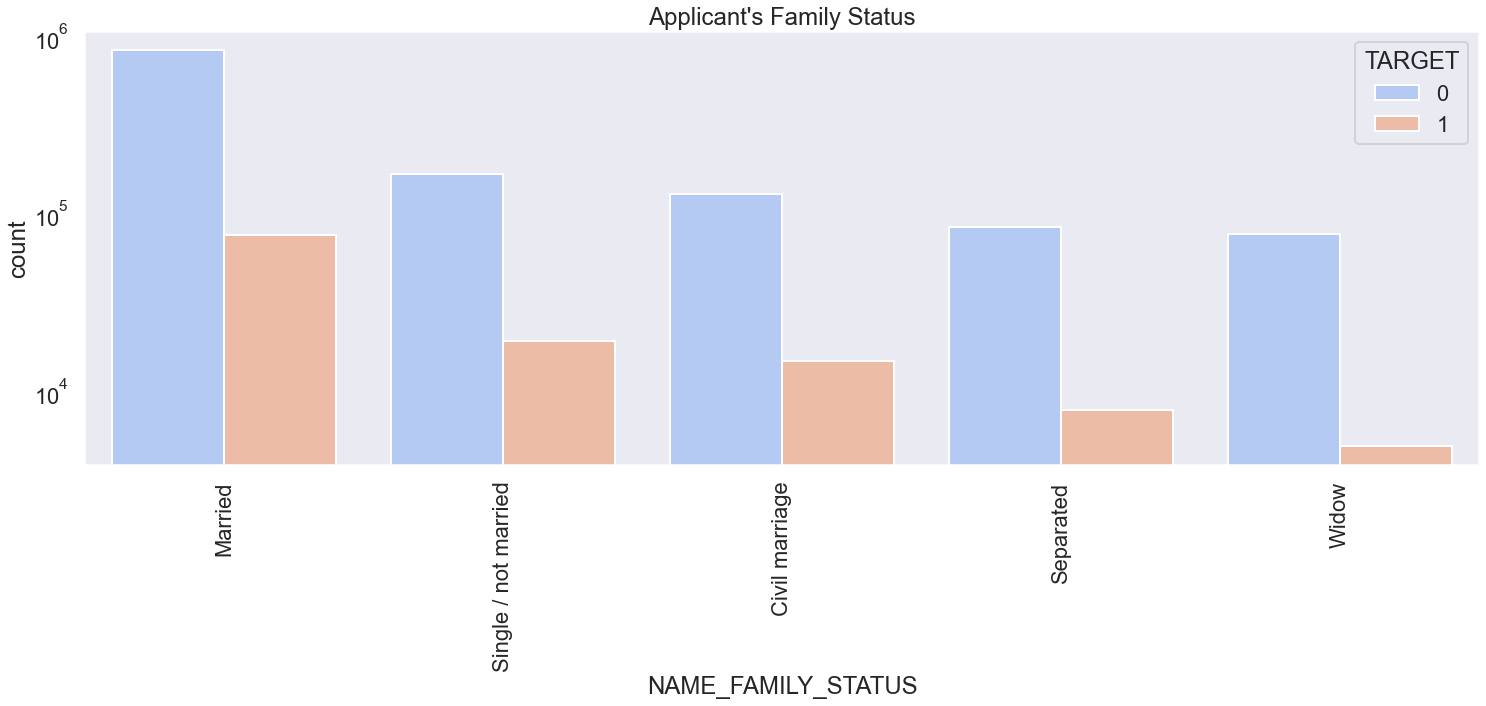

In [74]:
#plotting Distribution of Applicant's Martial Status
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.NAME_FAMILY_STATUS,
            title="Applicant's Family Status",
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that "Married" applicants are more likely to be defaulter.
- #### And also we can infer that "Widow" and "Separated" applicants are least defaulter.

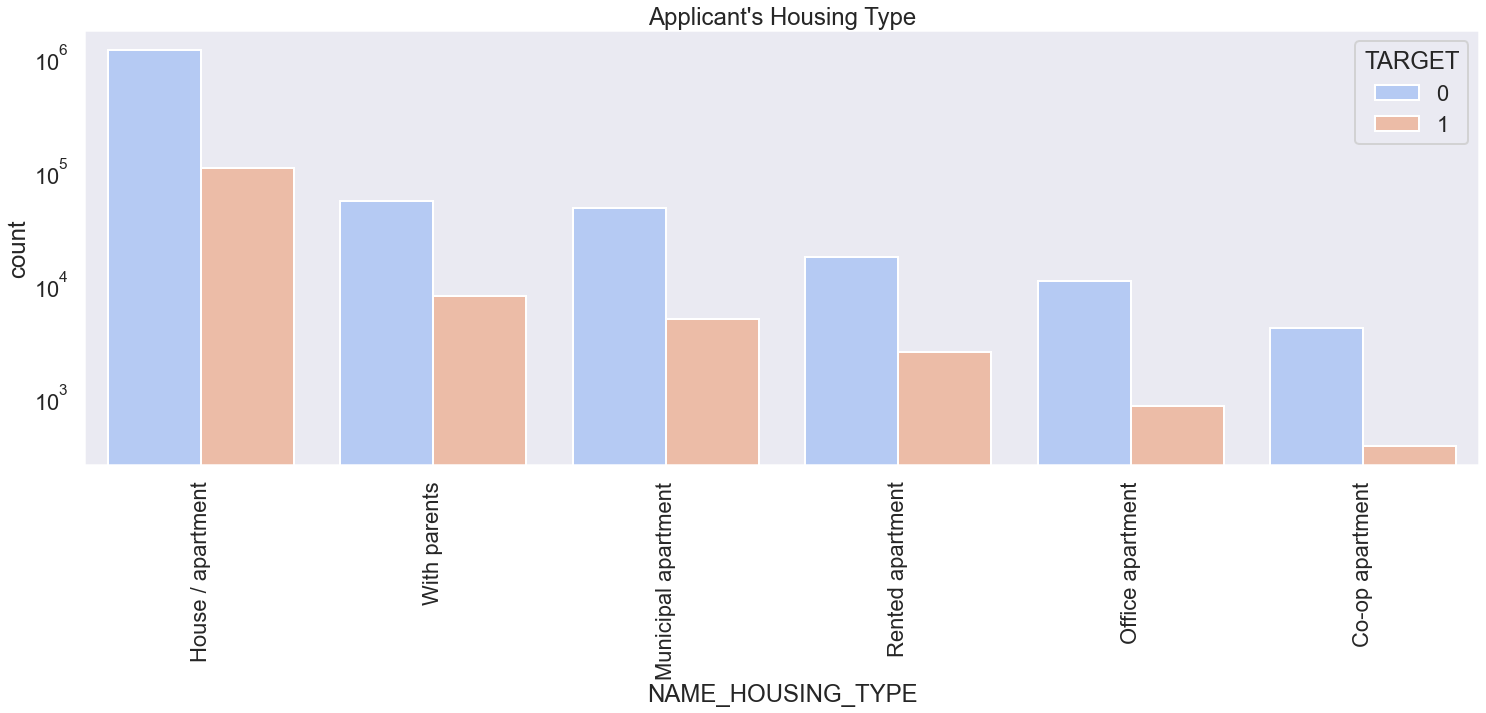

In [75]:
#plotting Distribution of Applicant's Housing Type
seg_uniplot(figsize=(25,8),
            col=application_previous_merged.NAME_HOUSING_TYPE,
            title="Applicant's Housing Type",
            hue=application_previous_merged.TARGET)

- #### From the above plot we can infer that applicants having "House/apartment" are more likely to be defaulter.
- #### And also we can infer that applicants having "Co-op apartment" are least defaulter.

    Lets find the correlation of the application_previous_merged by target values 0 and 1
    Before that lets store the merged dataset as target == 0 and target == 1

### Merged dataset by target (0,1)

In [76]:
application_previous_merged0 = application_previous_merged[application_previous_merged.TARGET == 0]
application_previous_merged1 = application_previous_merged[application_previous_merged.TARGET == 1]

In [77]:
#lets explore the dataset
application_previous_merged0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,EMPLOYED_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_TOOK_FOR_DECISION
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,12000000 and above,0-5,40-60,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-150000,NaN,40-60,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,NaN
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-350000,5-10,40-60,2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,THURSDAY,15,Y,1,XNA,Approved,181,Cash through the bank,XAP,Repeater,X

In [78]:
application_previous_merged1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,EMPLOYED_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_TOOK_FOR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000,0-5,18-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,540 and above
161,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,1,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000,1000000-12000000,0-5,40-60,1472630,Revolving loans,22500.000,0.0,450000.0,NaN,SATURDAY,14,Y,1,XAP,Approved,1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,1,XNA,0.0,XNA,Card X-Sell,NaN
162,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,1,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000,1000000-12000000,0-5,40-60,2426800,Cash loans,11117.700,157500.0,157500.0,157500.0,FRIDAY,15,Y,1,XNA,Approved,1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,1,XNA,24.0,high,Cash X-Sell: high,NaN
163,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,1,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000,1000000-12000000,0-5,40-60,1021215,Cash loans,31674.870,675000.0,744498.0,675000.0,FRIDAY,11,Y,1,XNA,Refused,1075,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,36.0,low_normal,Cash Street: low,NaN
164,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,1,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000,1000000-12000000,0-5,40-60,1035321,Consumer loans,4586.895,3

### Finding correlation for merged dataset where Target = 0

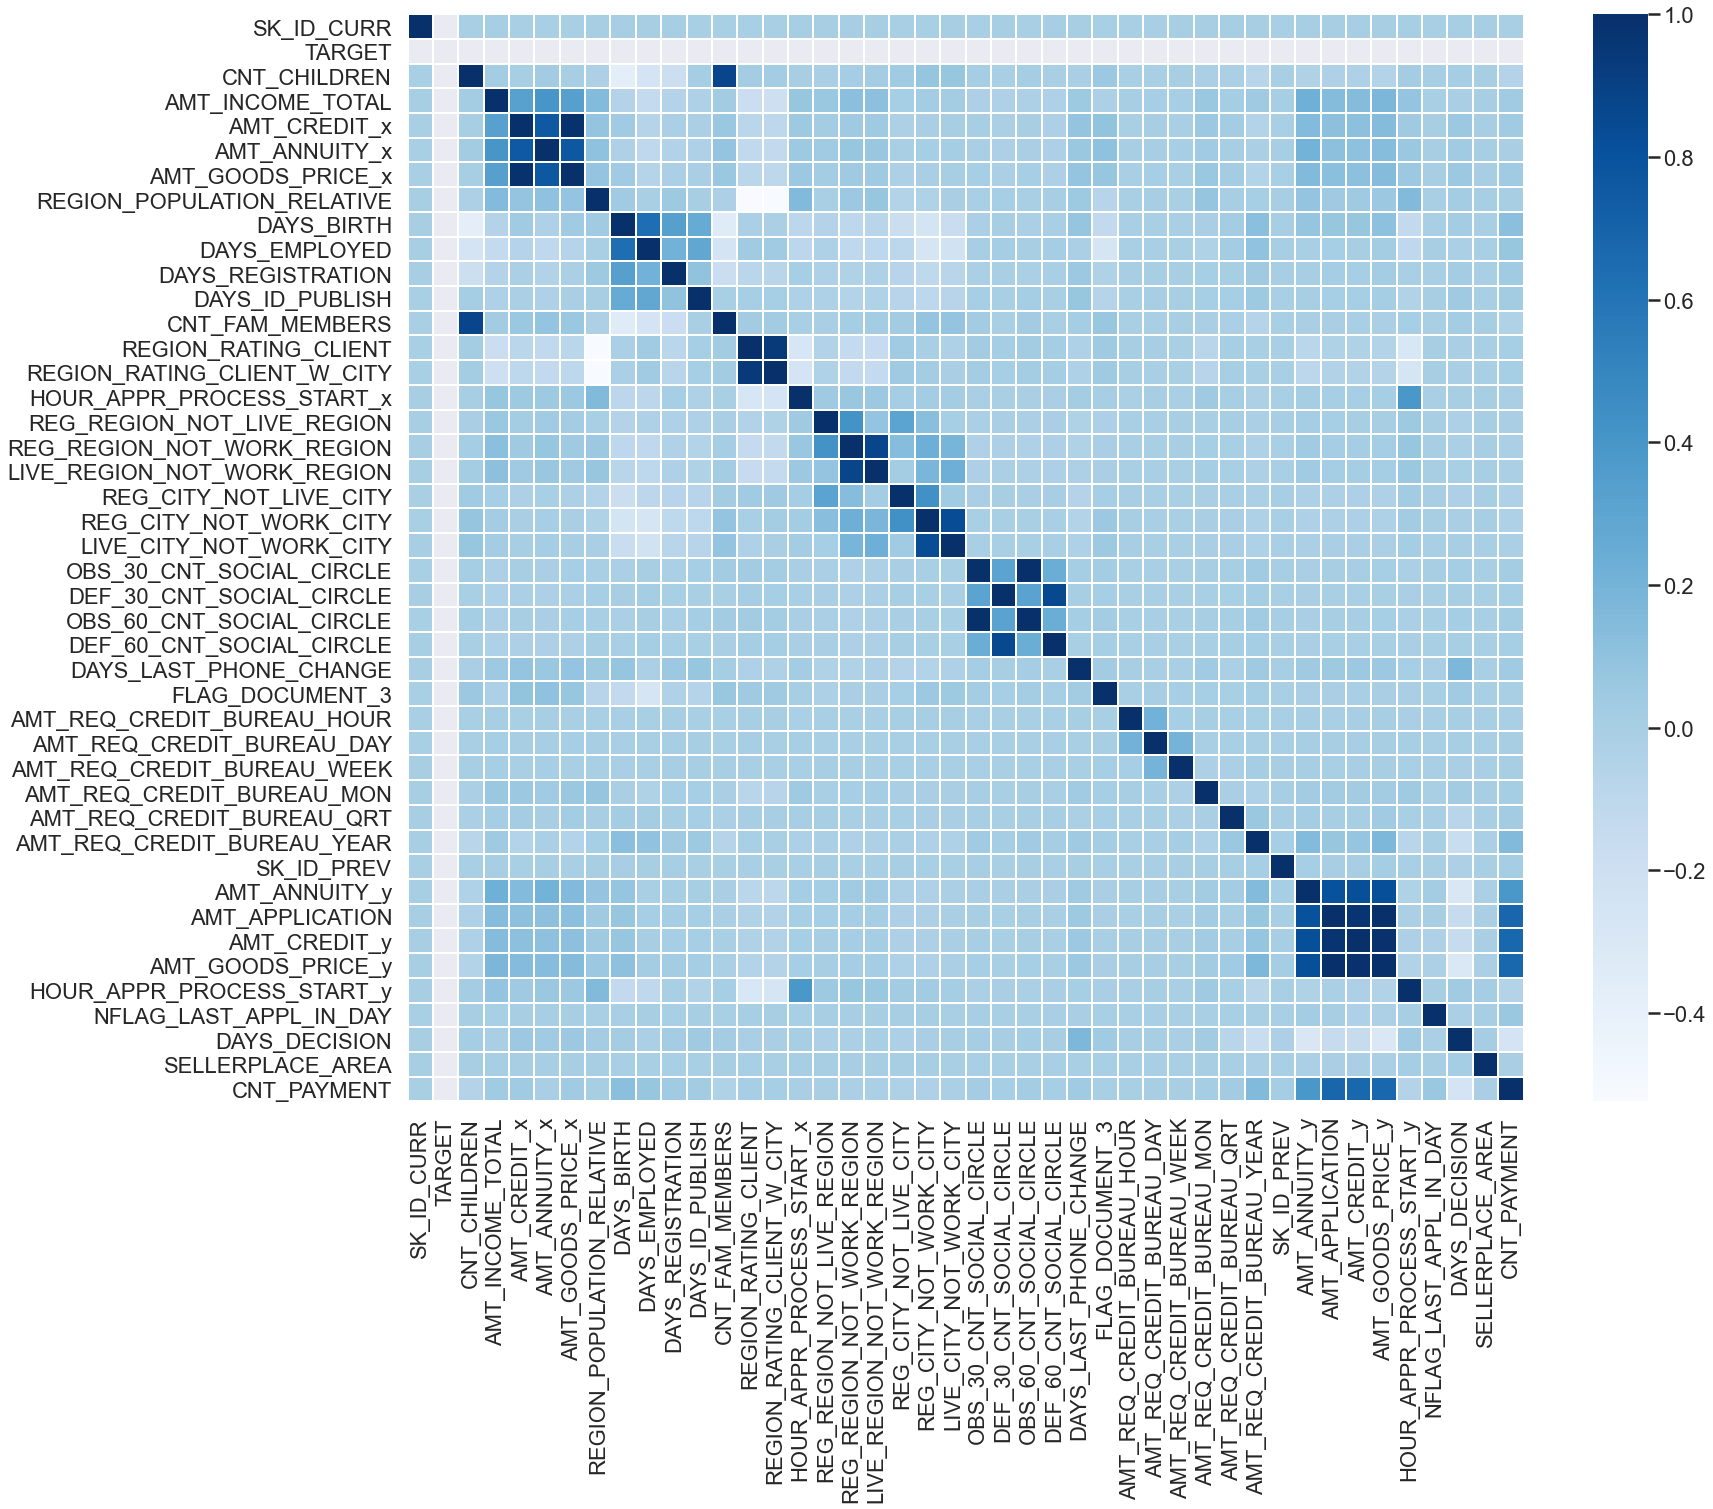

In [79]:
plt.figure(figsize=(25,20))

sns.heatmap(data=application_previous_merged0.corr(), cmap="Blues", annot=False, linewidth=1)

plt.show()

#### Top 10 correlation for target - 0

In [80]:
correlation_0 = application_previous_merged0.corr()

#lets use where function and np.triu to get the upper triangle of ones of dataset shape and type as bool.

correlation_0 = correlation_0.where(np.triu(np.ones(correlation_0.shape), k=1).astype(np.bool))

#Then lets unstack the column and also reset the index.

correlation_0 = correlation_0.unstack().reset_index().dropna(subset=[0])

#lets create 3 columns and name it as VAR1, VAR2 and Correlation_Value.

correlation_0.columns = ['VAR1', 'VAR2', 'Correlation_Value']

#To get a absolute value, we can use abs and assign it to Corr_abs.

correlation_0['Corr_abs'] = abs(correlation_0['Correlation_Value'])

#Finally we can sort the values in descending order to get top 10 correlation values

correlation_0.sort_values(by = "Corr_abs", ascending =False, inplace = True)

correlation_0.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999888,0.999888
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998578,0.998578
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.993299,0.993299
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.986593,0.986593
1664,AMT_CREDIT_y,AMT_APPLICATION,0.975725,0.975725
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.944356,0.944356
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878475,0.878475
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.875761,0.875761
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.863099,0.863099
944,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.835641,0.835641


### Finding correlation for merged dataset where Target = 1

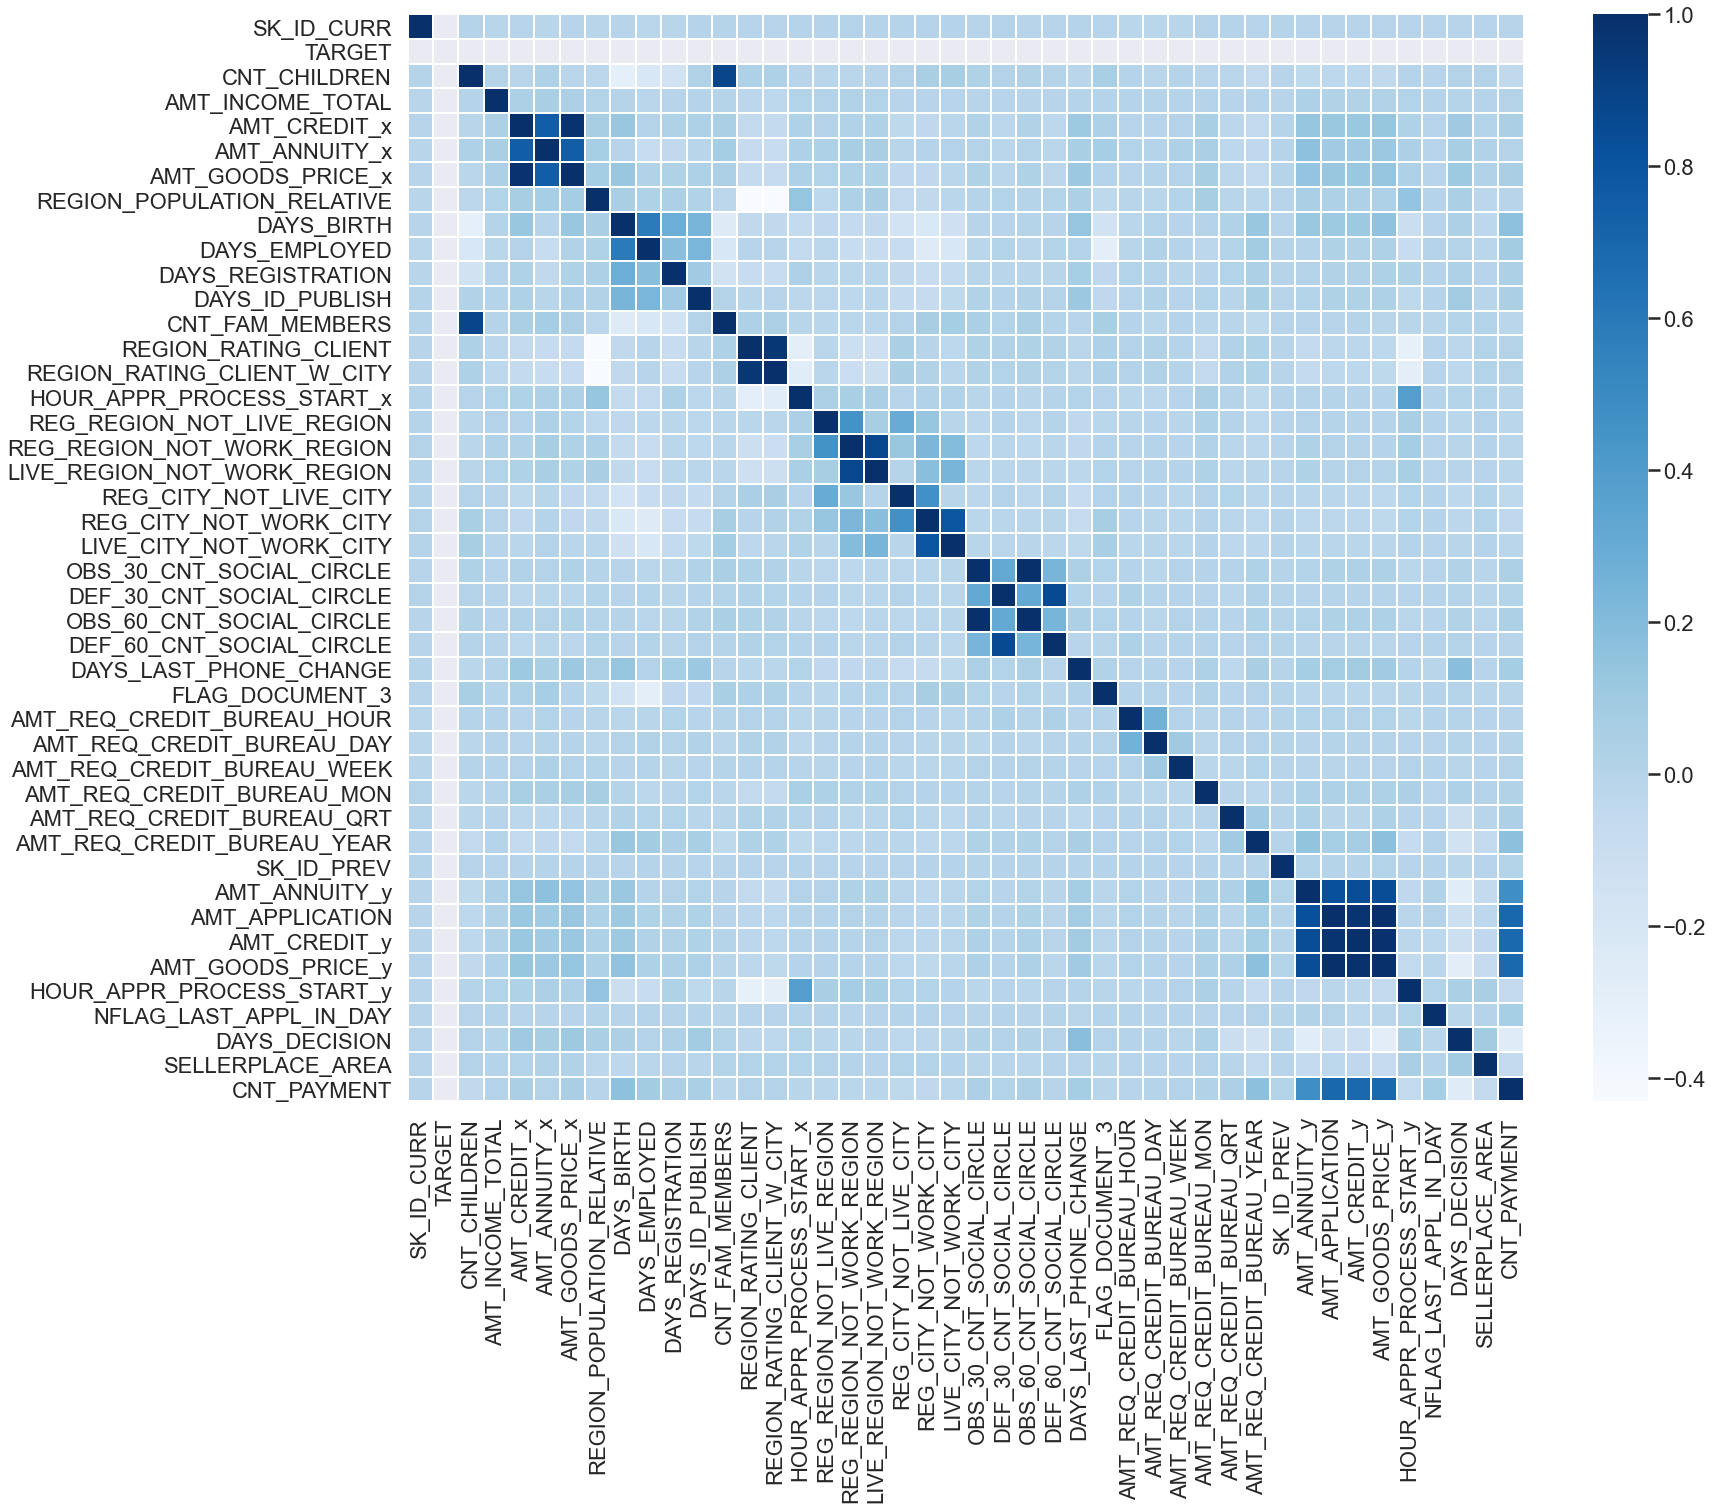

In [81]:
plt.figure(figsize=(25,20))

sns.heatmap(data=application_previous_merged1.corr(), cmap="Blues", annot=False, linewidth=1)

plt.show()

#### Top 10 correlation for target - 1

In [82]:
correlation_1 = application_previous_merged1.corr()

#lets use where function and np.triu to get the upper triangle of ones of dataset shape and type as bool.

correlation_1 = correlation_1.where(np.triu(np.ones(correlation_1.shape), k=1).astype(np.bool))

#Then lets unstack the column and also reset the index.

correlation_1 = correlation_1.unstack().reset_index().dropna(subset=[0])

#lets create 3 columns and name it as VAR1, VAR2 and Correlation_Value.

correlation_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']

#To get a absolute value, we can use abs and assign it to Corr_abs.

correlation_1['Corr_abs'] = abs(correlation_1['Correlation_Value'])

#Finally we can sort the values in descending order to get top 10 correlation values

correlation_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)

correlation_1.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999676,0.999676
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998378,0.998378
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.992302,0.992302
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.982912,0.982912
1664,AMT_CREDIT_y,AMT_APPLICATION,0.975377,0.975377
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956483,0.956483
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886300,0.886300
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.873130,0.873130
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858281,0.858281
1663,AMT_CREDIT_y,AMT_ANNUITY_y,0.840461,0.840461


### Bi-Variate Analysis

#### Lets define a function that inputs 2 data,x,y and title for subplots

In [83]:
def bi_plot(data1,x1,y1,title1,data2,x2,y2,title2):
    
    plt.figure(figsize=(20,8)) 
    
    #Subplot 1
    
    plt.subplot(1,2,1)
    #data1 as 1st dataframe, y1 as 1st y-axis and x1 as 1st x-axis for Subplot 1
    sns.boxplot(data = data1,y = y1,x = x1)
    #title1 as 1st Title for Subplot 1 
    plt.title(title1)
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    #Subplot 2
    
    plt.subplot(1,2,2)
    #data2 as 2nd dataframe, y2 as 2nd y-axis and x2 as 2nd x-axis for Subplot 2
    sns.boxplot(data = data2,y = y2,x = x2)
    #title2 as 2nd Title for Subplot 2
    plt.title(title2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.show()

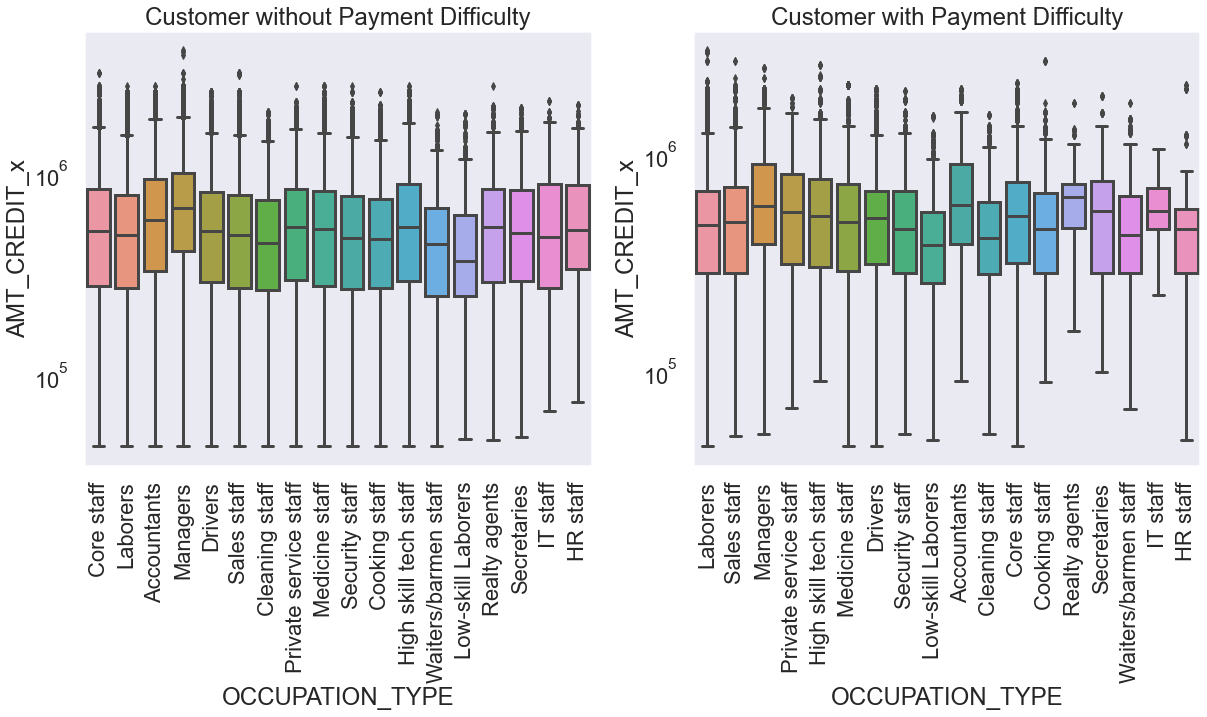

In [84]:
#plotting bi-variate for Amount Credit and Occupation Type for Customer without Payment Difficulty and Customer with Payment Difficulty

bi_plot(data1 = application_previous_merged0,
        x1='OCCUPATION_TYPE',
        y1='AMT_CREDIT_x',
        title1 = 'Customer without Payment Difficulty',
        data2 = application_previous_merged1,
        x2='OCCUPATION_TYPE',
        y2='AMT_CREDIT_x',
        title2= 'Customer with Payment Difficulty')

- #### From the above plot we can infer that Managers,IT staff,Reality agent,Accountants occupation type applicants are top clients that took high credit amount and facing difficulty paying them back.
- #### And also we can infer that "Security staff" and "Cooking staff" applicants have almost same median.

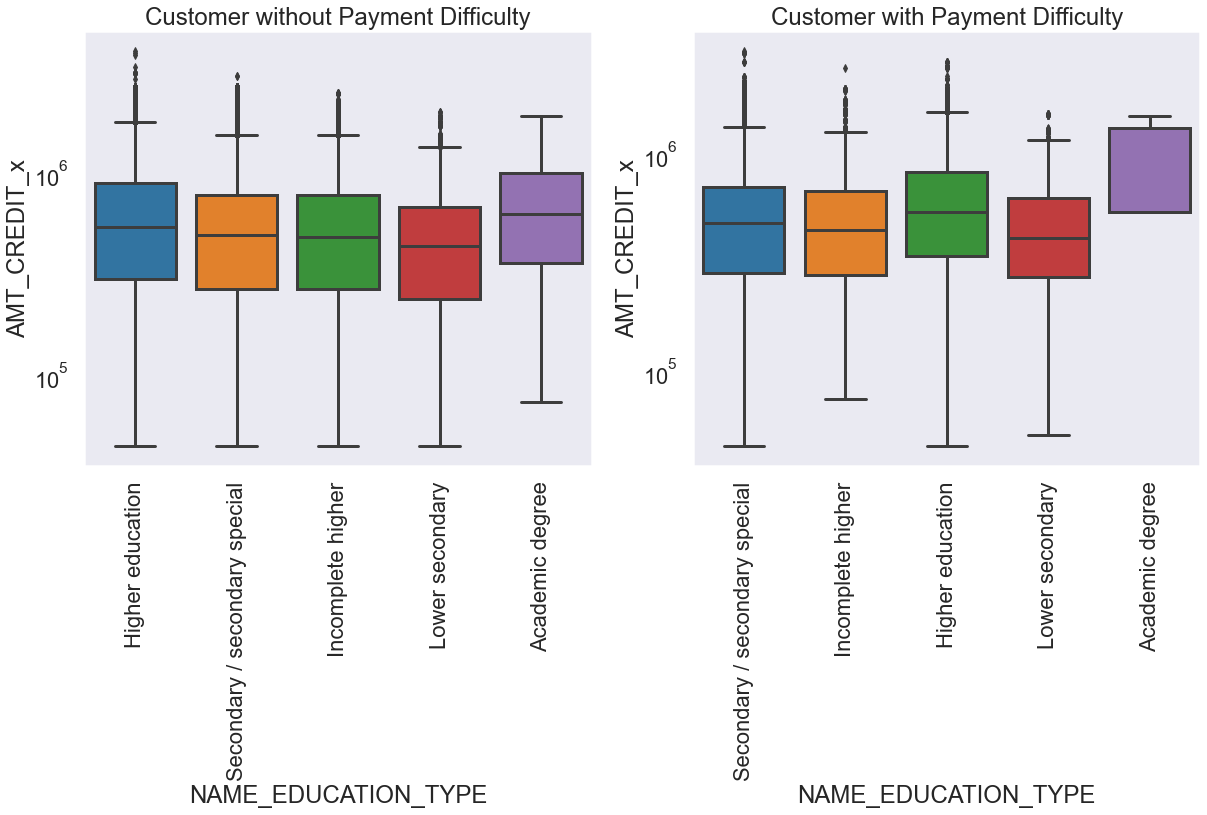

In [85]:
##plotting bi-variate for Amount Credit and Education Type for Customer without Payment Difficulty and Customer with Payment Difficulty

bi_plot(data1 = application_previous_merged0,
        x1='NAME_EDUCATION_TYPE',
        y1='AMT_CREDIT_x',
        title1 = 'Customer without Payment Difficulty',
        data2 = application_previous_merged1,
        x2='NAME_EDUCATION_TYPE',
        y2='AMT_CREDIT_x',
        title2= 'Customer with Payment Difficulty')

- #### From the above plot we can infer that applicant having academic degree takes more credit amount loans and then faces difficulty repaying them back.
- #### And also we can infer that applicant having lower secondary education takes less amount of loan and faces less difficulty in repaying them back.

Lets plot a scatter plot for the merged dataset to infer them a little more.

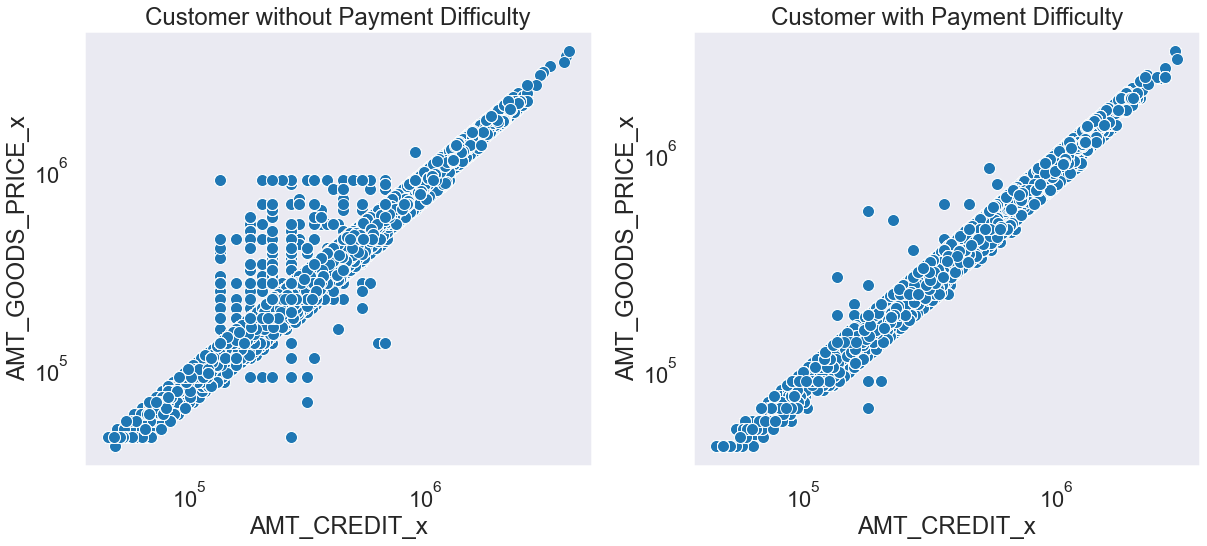

In [86]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=application_previous_merged0,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer without Payment Difficulty')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=application_previous_merged1,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer with Payment Difficulty')
plt.xscale('log')
plt.yscale('log')

plt.show()

- #### The above plots shows that as the goods price increases, the credit amount also increases.
- #### Both Customer without Payment Difficulty and Customer with Payment Difficulty holds same inference.

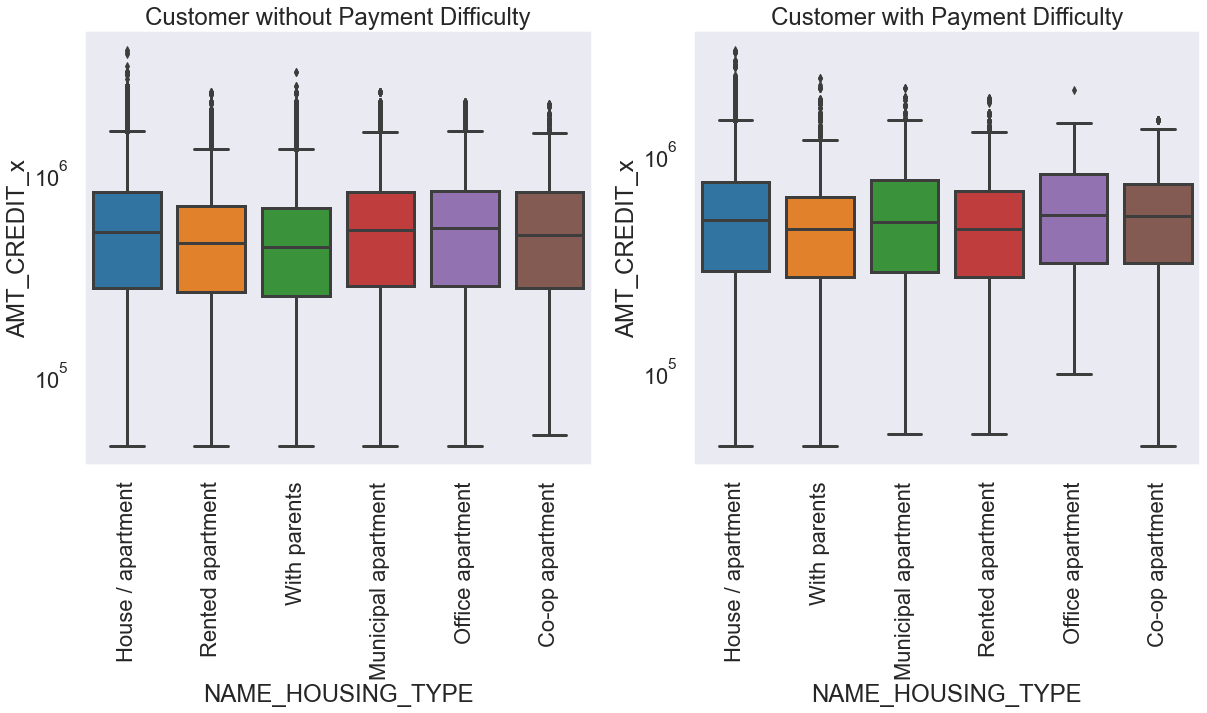

In [87]:
bi_plot(data1 = application_previous_merged0,
        x1='NAME_HOUSING_TYPE',
        y1='AMT_CREDIT_x',
        title1 = 'Customer without Payment Difficulty',
        data2 = application_previous_merged1,
        x2='NAME_HOUSING_TYPE',
        y2='AMT_CREDIT_x',
        title2= 'Customer with Payment Difficulty')

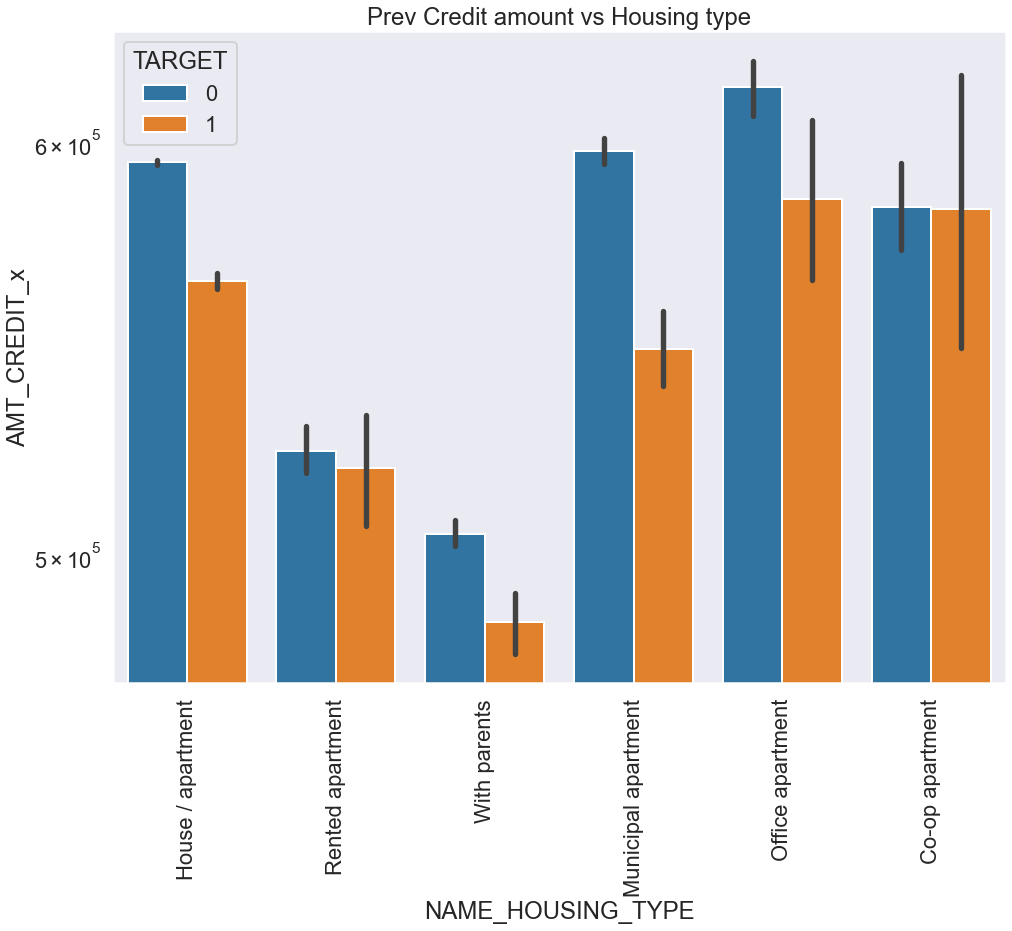

In [95]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =application_previous_merged ,y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

- #### From the above plot we can infer that clients 'with parents' housing type has the lowest credit amount and hence they least likely to default the loan.
- #### And also we can infer that clients of "office apartment' housing type have highest credit amount in both target 0 and 1 and hence they are most likely to default loan.

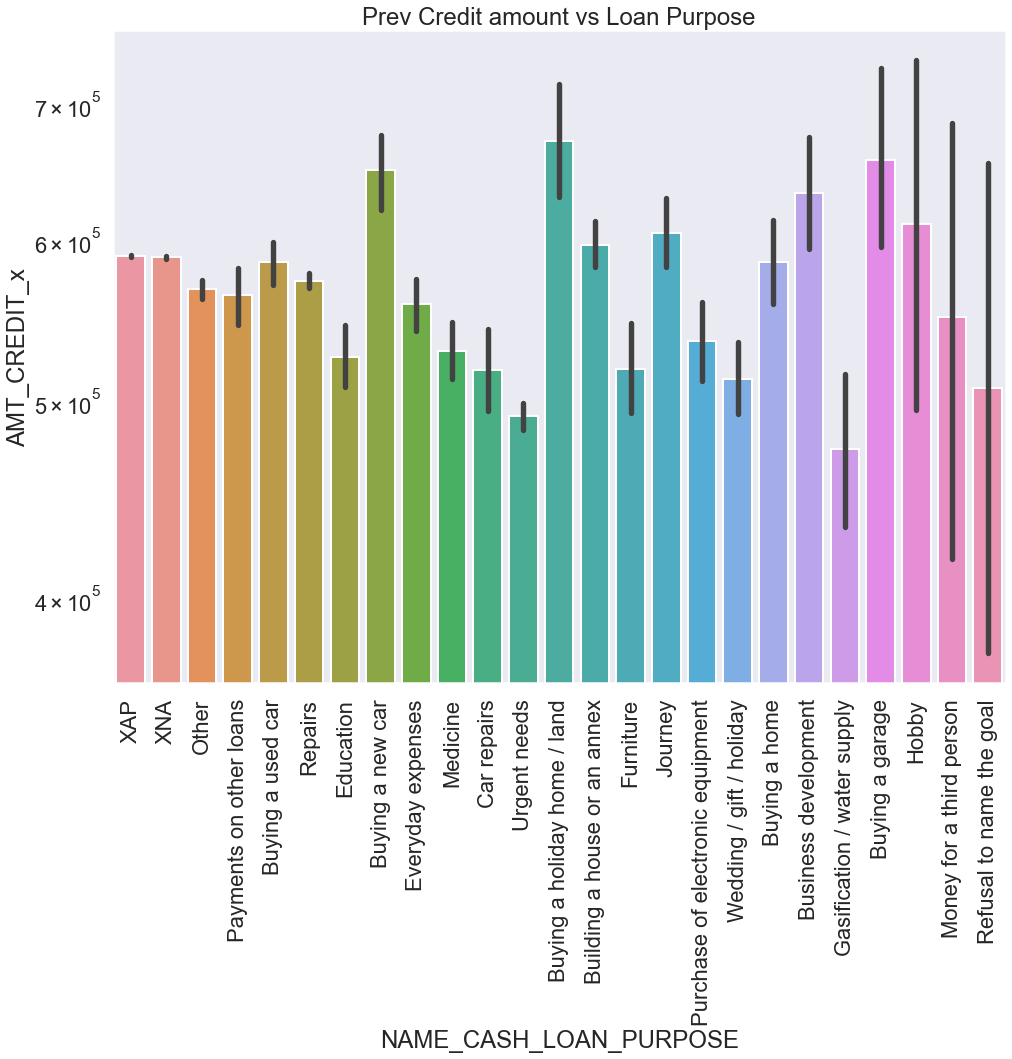

In [98]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =application_previous_merged, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

- #### From the above plot we can infer that clients with cash loan purpose of "Buying a holiday home / land", Buying a garage", "Buying a new car", and "hobby" takes more credit amount.

### Conclusion

#### 1.Bank should focus on applicants from housing type ‘With parents’ as they are having least number of unsuccessful payments.
#### 2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
#### 3. Bank should avoid loans for "Married" applicants as they are more likely to be defaulter.
#### 4. Bank can avoid loans for applicants with "academic degree" as they takes more credit amount loans and then faces difficulty repaying them back or Bank can provide lesser credit amount loans with increased in interest rate.
#### 5. Bank can focus on applicants with "lower secondary" education as they takes less amount of loan and faces less difficulty in repaying them back.
#### 6.Bank can avoid loans for applicants from housing type "office apartment" as they are having have highest credit amount and hence they are most likely to default loan.